## 6. **Model Training**

This phase involves building, evaluating, and refining machine learning models to classify wildfire causes (human vs. natural) based on historical and environmental features.

#### 6.1 Modeling
- Split the dataset into **training** and **test** sets to evaluate generalization performance.
- Train several **baseline classification models**, including:
  - **Logistic Regression**
  - **Random Forest**
  - **LightGBM**
  - **XGBoost**

#### 6.2 Model Tuning and Improvements
- Apply **hyperparameter tuning** using techniques such as Grid Search or Random Search to improve model performance.
- Compare results across models to identify the best-performing one.
- If results are promising, explore **advanced ensemble techniques** or stack multiple models for better predictions.

## 7. **Insights and Reporting**
- Analyze **feature importances** (e.g., via SHAP values or built-in methods from tree-based models) to understand the key drivers of wildfire causes.
- Translate model findings into **actionable insights** for:
  - **Wildfire prevention**
  - **Resource prioritization**
  - **Policy recommendations**


In [1]:
import pandas as pd
final_df = pd.read_csv('final_csv1.csv')  # no C:\ path needed!
final_df.head()

,NWCG_CAUSE_CLASSIFICATION,YEAR,MONTH,DAY,HOUR,FIRE_SIZE,LATITUDE,LONGITUDE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
0,0,2005,2,2,13,0.002987,1.115575,-0.401276,-1.435475,0.0,-2.088793,-2.468904,-2.825601,-2.572744,0.441332,2.347727,1.926065,1.503476,0.018059,-1.022916
1,1,2004,5,12,8,0.002987,0.673935,-0.105742,0.548493,0.0,-0.500801,-0.952283,0.518069,0.876718,0.820275,3.511782,1.324906,-0.752243,1.902093,-0.375632
2,0,2004,5,31,19,0.002987,0.694384,-0.268456,-0.173317,0.0,0.610794,-0.193973,0.518069,0.426789,0.753043,3.046354,1.324906,-0.752243,-1.166294,0.678553
3,1,2004,6,28,16,0.002987,0.524351,0.135600,0.096858,0.0,0.769593,0.456007,-0.278043,-0.473071,0.753043,3.398142,0.503706,-0.973475,-0.998968,-0.375632
4,1,2004,6,28,16,0.002987,0.524351,0.125908,0.096858,0.0,0.769593,0.456007,-0.278043,-0.473071,0.753043,3.398142,0.503706,-0.973475,-0.998968,-0.375632


In [2]:
final_df.describe()

,NWCG_CAUSE_CLASSIFICATION,YEAR,MONTH,DAY,HOUR,FIRE_SIZE,LATITUDE,LONGITUDE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,MONTH_sin,MONTH_cos,HOUR_sin,HOUR_cos
count,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,1.574070e+05,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000,157407.000000
mean,0.138348,2007.294904,7.099919,15.473219,12.222849,2.987162e-03,0.056229,-0.017798,0.022487,0.000647,0.018791,0.016280,0.009971,0.016353,0.745718,3.320715,-0.020058,-0.008836,0.022378,-0.002330
std,0.345266,7.125293,2.227161,8.956838,6.269248,1.662803e-13,1.015211,1.001873,0.994799,0.003601,0.996149,0.998798,0.984975,0.985955,0.155063,0.756318,0.993334,0.990230,0.994856,1.009524
min,0.000000,1992.000000,1.000000,1.000000,0.000000,2.987162e-03,-1.884811,-2.070652,-2.697633,0.000000,-4.073783,-4.310514,-4.577048,-4.072510,0.000000,0.000000,-1.138693,-0.973475,-1.223366,-1.070254
25%,0.000000,2002.000000,6.000000,8.000000,9.000000,2.987162e-03,-0.717083,-0.735577,-0.624952,0.000000,-0.739000,-0.518963,-0.278043,-0.173118,0.672912,3.046354,-0.918654,-0.752243,-0.998968,-0.884130
50%,0.000000,2007.000000,7.000000,15.000000,13.000000,2.987162e-03,0.077266,-0.142325,0.008144,0.000000,0.213796,0.131017,0.358847,0.276812,0.753043,3.297954,-0.317494,-0.147825,0.018059,-0.375632
75%,0.000000,2013.000000,9.000000,23.000000,17.000000,2.987162e-03,0.840967,0.683378,0.548493,0.000000,0.848993,0.672667,0.677292,0.576765,0.820275,3.598508,0.503706,0.677826,0.451562,1.013612
max,1.000000,2020.000000,12.000000,31.000000,23.000000,2.987162e-03,1.904239,2.973951,6.956062,0.020702,2.516384,3.489248,1.154959,1.176672,2.211601,7.937389,2.146105,2.329126,2.126490,1.708234


In [4]:
final_df.columns

Index(['NWCG_CAUSE_CLASSIFICATION', 'YEAR', 'MONTH', 'DAY', 'HOUR',
       'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'AWND', 'PRCP', 'TMAX', 'TMIN',
       'WDF2', 'WDF5', 'WSF2', 'WSF5', 'MONTH_sin', 'MONTH_cos', 'HOUR_sin',
       'HOUR_cos'],
      dtype='object')

In [5]:
final_df.isnull().sum()

NWCG_CAUSE_CLASSIFICATION    0
YEAR                         0
MONTH                        0
DAY                          0
HOUR                         0
FIRE_SIZE                    0
LATITUDE                     0
LONGITUDE                    0
AWND                         0
PRCP                         0
TMAX                         0
TMIN                         0
WDF2                         0
WDF5                         0
WSF2                         0
WSF5                         0
MONTH_sin                    0
MONTH_cos                    0
HOUR_sin                     0
HOUR_cos                     0
dtype: int64

### Handling Class Imbalance with SMOTE

The dataset exhibits a significant class imbalance in the target variable `NWCG_CAUSE_CLASSIFICATION`, where the majority of wildfire causes are labeled as **human-caused** (`0`) and a minority as **natural** (`1`). Addressing this imbalance is crucial to ensure the classifier does not become biased toward the majority class.

#### Original Training Class Distribution:
NWCG_CAUSE_CLASSIFICATION
- 0 :108503
- 1 :17422


To handle this, we applied **SMOTE** (Synthetic Minority Over-sampling Technique) exclusively to the training data. SMOTE generates synthetic examples of the minority class (`1`) to balance the class distribution, improving the model’s ability to learn decision boundaries for both classes.

#### Resampled Training Class Distribution After SMOTE:

NWCG_CAUSE_CLASSIFICATION
- 0 : 108503
- 1 : 108503

This ensures an equal number of samples for both classes, providing a more balanced foundation for training robust and fair classification models.


In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = final_df.drop(columns=['NWCG_CAUSE_CLASSIFICATION'])
y = final_df['NWCG_CAUSE_CLASSIFICATION']

#Train-test split first 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE ONLY on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original training class distribution:\n{y_train.value_counts()}")
print(f"Resampled training class distribution:\n{y_train_resampled.value_counts()}")

Original training class distribution:
NWCG_CAUSE_CLASSIFICATION
0    108503
1     17422
Name: count, dtype: int64
Resampled training class distribution:
NWCG_CAUSE_CLASSIFICATION
0    108503
1    108503
Name: count, dtype: int64


## 6. Wildfire Cause Classification - Model Training

This section initiates the training phase of the wildfire cause classification project. The objective is to build predictive models that can classify fire ignition causes as **natural** or **human-caused**, using a comprehensive set of features derived from historical wildfire and weather data across California.

#### Goal:
Train multiple machine learning models on the full feature set, including:
- **Temporal** features (e.g., month, day, hour, and their cyclical encodings),
- **Spatial** features (latitude and longitude),
- **Weather-related** features (wind, temperature, precipitation),
- **Transformed fire size** (using Box-Cox or log transformation),
- Other engineered features relevant to wildfire conditions.

#### Approach:
This section will:
- Train a range of supervised classification models,
- Use the entire feature set without manual feature selection,
- Establish baseline performance for comparison,
- Prepare for hyperparameter tuning and feature importance analysis in later stages.

The models will include traditional and ensemble-based learners such as:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting (e.g., XGBoost)
- Support Vector Machines
- k-Nearest Neighbors
- Neural Networks (optional, if performance suggests value)

In [7]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings globally
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 6.1 Modeling

### 6.1.1 **Logistic Regression:**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)

#Train the model on SMOTE-resampled data
logreg.fit(X_train_resampled, y_train_resampled)

# Training and testing sets prediction
y_train_pred = logreg.predict(X_train_resampled)
y_test_pred = logreg.predict(X_test)

# Accuracy
train_acc_lr = accuracy_score(y_train_resampled, y_train_pred)
test_acc_lr = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc_lr:.4f}")
print(f"Testing Accuracy: {test_acc_lr:.4f}")

Training Accuracy: 0.8336
Testing Accuracy: 0.8265


In [53]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Step 5: Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_test_pred)

# Step 6: Classification report
class_report_lr = classification_report(y_test, y_test_pred)

# Step 7: ROC AUC score
roc_auc_lr = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Print performance metrics
print(f"Confusion Matrix (Logistic Regression):\n{conf_matrix_lr}")
print(f"\nClassification Report (Logistic Regression):\n{class_report_lr}")
print(f"ROC AUC Score (Logistic Regression): {roc_auc_lr:.4f}")

Confusion Matrix (Logistic Regression):
[[22454  4673]
 [  789  3566]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     27127
           1       0.43      0.82      0.57      4355

    accuracy                           0.83     31482
   macro avg       0.70      0.82      0.73     31482
weighted avg       0.89      0.83      0.85     31482

ROC AUC Score (Logistic Regression): 0.8994


### ---> Logistic Regression Model Performance

**Key Insights:**

- The model shows excellent **recall for the minority class** (Human), but **precision for class 1** (Natural) is lower, meaning some natural caused fires are misclassified as fire.
- **Accuracy** of 83% indicates the model is performing well overall but might be influenced by the class imbalance.
- The **ROC AUC score** of 0.8994 suggests the model is good at distinguishing between "fire" and "non-fire" instances, with a solid performance despite the class imbalance.
- There is potential to improve **precision for class 1** by experimenting with different models, decision thresholds, resampling techniques, or using more complex classifiers.



### 6.1.2 **Random Forest Classifier:**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on SMOTE-resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on training and testing sets
y_train_pred_rf = rf_classifier.predict(X_train_resampled)
y_test_pred_rf = rf_classifier.predict(X_test)

# Accuracy
train_accuracy_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Training Accuracy (RF): {train_accuracy_rf:.4f}")
print(f"Testing Accuracy (RF): {test_accuracy_rf:.4f}")


Training Accuracy (RF): 1.0000
Testing Accuracy (RF): 0.9490


In [31]:
# Performance Metrics
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
class_report_rf = classification_report(y_test, y_test_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

print(f"\nConfusion Matrix (RF):\n{conf_matrix_rf}")
print(f"\nClassification Report (RF):\n{class_report_rf}")
print(f"ROC AUC Score (RF): {roc_auc_rf:.4f}")


Confusion Matrix (RF):
[[26266   861]
 [  744  3611]]

Classification Report (RF):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27127
           1       0.81      0.83      0.82      4355

    accuracy                           0.95     31482
   macro avg       0.89      0.90      0.89     31482
weighted avg       0.95      0.95      0.95     31482

ROC AUC Score (RF): 0.9719


### ---> Random Forest Model Performance

#### **Performance Overview:**
- **Training Accuracy**: 1.0000 — The model achieves perfect accuracy on the training set, indicating that it may have memorized the data rather than learning generalized patterns.
- **Testing Accuracy**: 94.90% — Although the testing accuracy is still strong, the gap between the training and testing accuracy suggests potential overfitting. The model performs significantly better on the training set than on the unseen testing set.
- **Confusion Matrix**: 
  - The model has a **high recall** for class 1 (fire) at 0.83, but the **precision** for class 1 is slightly lower at 0.81, meaning that some non-fire instances are misclassified as fire.
- **ROC AUC Score**: 0.9719 — This indicates excellent performance in distinguishing between the two classes, especially with a strong ability to separate fire and non-fire instances.

#### **Signs of Overfitting:**
- The **perfect training accuracy** (1.0000) compared to the lower **testing accuracy** (94.90%) strongly suggests overfitting. Overfitting occurs when the model learns the specific details of the training data, including noise and outliers, which can lead to poor generalization on unseen data.

#### **Steps to Improve Model Performance:**

1. **Reduce Model Complexity:**
   - **Limit tree depth**: By setting the `max_depth` parameter, you can prevent the trees from growing too deep, which forces the model to generalize more effectively.
   - **Increase minimum samples per leaf**: Set a higher value for `min_samples_leaf` to make each leaf node contain a larger number of samples. This prevents the model from fitting to noise in the data.

2. **Cross-Validation:**
   - Implement **k-fold cross-validation** to get a better understanding of the model’s performance across different subsets of the data, ensuring that the model generalizes well on unseen data and is not simply overfitting to one particular split.

3. **Feature Selection or Engineering:**
   - If the dataset contains irrelevant or redundant features, performing **feature selection** can help reduce the model’s complexity, making it less prone to overfitting. Consider using techniques like Recursive Feature Elimination (RFE) or feature importance from the Random Forest itself.

4. **Regularization:**
   - Apply regularization techniques like **pruning** to remove unnecessary branches that don't contribute much to predictive power, which can help reduce overfitting.

5. **Hyperparameter Tuning:**
   - Tune hyperparameters such as `n_estimators`, `max_features`, and `min_samples_split` to control the complexity of the model and find the optimal configuration for better generalization.

6. **Increase Training Data:**
   - Overfitting can also be mitigated by providing more diverse data. If possible, gather more data to train the model, as this can help it learn better generalizable patterns.

7. **Ensemble Methods:**
   - Consider using **ensemble techniques** such as **bagging** or **boosting** to combine multiple weak models into a stronger one. This can help improve stability and reduce overfitting.

8. **Use a Validation Set:**
   - Besides the training and test sets, use a **validation set** to tune the model and select hyperparameters. This will give a better understanding of how the model performs on unseen data during the training phase.

### 6.1.3 **Light Gradient Boosting** 

In [33]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize LightGBM Classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.05)

# Train the model on SMOTE-resampled data
lgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on training and testing sets
y_train_pred_lgb = lgb_classifier.predict(X_train_resampled)
y_test_pred_lgb = lgb_classifier.predict(X_test)

# Calculate accuracy
train_accuracy_lgb = accuracy_score(y_train_resampled, y_train_pred_lgb)
test_accuracy_lgb = accuracy_score(y_test, y_test_pred_lgb)

print(f"Training Accuracy (LGB): {train_accuracy_lgb:.4f}")
print(f"Testing Accuracy (LGB): {test_accuracy_lgb:.4f}")

[LightGBM] [Info] Number of positive: 108503, number of negative: 108503
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3911
[LightGBM] [Info] Number of data points in the train set: 217006, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy (LGB): 0.9313
Testing Accuracy (LGB): 0.9078


In [34]:
# Performance Metrics
conf_matrix_lgb = confusion_matrix(y_test, y_test_pred_lgb)
class_report_lgb = classification_report(y_test, y_test_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, lgb_classifier.predict_proba(X_test)[:, 1])

# Performance metrics
print(f"\nConfusion Matrix (LGB):\n{conf_matrix_lgb}")
print(f"\nClassification Report (LGB):\n{class_report_lgb}")
print(f"ROC AUC Score (LGB): {roc_auc_lgb:.4f}")


Confusion Matrix (LGB):
[[24935  2192]
 [  711  3644]]

Classification Report (LGB):
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     27127
           1       0.62      0.84      0.72      4355

    accuracy                           0.91     31482
   macro avg       0.80      0.88      0.83     31482
weighted avg       0.92      0.91      0.91     31482

ROC AUC Score (LGB): 0.9516


### ---> LightGBM Model Performance

#### LightGBM (LGB)
- **Training Accuracy (LGB)**: 93.13%
- **Testing Accuracy (LGB)**: 90.78%
- **Confusion Matrix (LGB)**:
  - Precision for class 0 (human-caused): 0.97
  - Precision for class 1 (natural-caused): 0.62
  - Recall for class 1 (natural-caused): 0.84
  - The model performs well in identifying natural-caused fires with strong recall, but the precision for natural-caused fires (class 1) is lower, indicating some false positives.

- **Classification Report (LGB)**: 
  - The model has high precision and recall for human-caused fires (class 0), but its performance for natural-caused fires (class 1) can be improved, particularly in terms of precision. The recall for natural-caused fires is good, indicating that most natural-caused fires are correctly identified.
- **ROC AUC (LGB)**: 0.9516
  - The ROC AUC score is high, indicating that the model effectively distinguishes between human-caused and natural-caused fires.

#### Key Improvements:
1. **Handling Class Imbalance**: The model’s lower precision for natural-caused fires (class 1) suggests that it tends to misclassify some natural-caused fires as human-caused. This can be improved by addressing class imbalance using techniques like class weighting or resampling.

2. **Hyperparameter Tuning**: Optimizing hyperparameters such as `num_leaves`, `max_depth`, `learning_rate`, and `n_estimators` could help improve the model’s ability to classify natural-caused fires (class 1) more accurately.

3. **Feature Engineering**: Further exploration of feature interactions or transformations might allow the model to better capture the patterns that distinguish natural-caused fires from human-caused fires.

LightGBM demonstrates strong performance in distinguishing between human-caused and natural-caused fires, with high recall for natural-caused fires. However, there is room to improve precision for natural-caused fires, reducing the number of false positives. Fine-tuning hyperparameters and addressing class imbalance could further enhance the model's performance, especially for detecting natural-caused fires.



### 6.1.4 **XGBOOST - Extreme Gradient Boosting**

In [54]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.05, objective='binary:logistic')

# Train the model on SMOTE-resampled data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on training and testing sets
y_train_pred_xgb = xgb_classifier.predict(X_train_resampled)
y_test_pred_xgb = xgb_classifier.predict(X_test)

# Accuracy
train_accuracy_xgb = accuracy_score(y_train_resampled, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print(f"Training Accuracy (XGB): {train_accuracy_xgb:.4f}")
print(f"Testing Accuracy (XGB): {test_accuracy_xgb:.4f}")

Training Accuracy (XGB): 0.9235
Testing Accuracy (XGB): 0.9021


In [56]:
# Performance Metrics
conf_matrix_xgb = confusion_matrix(y_test, y_test_pred_xgb)
class_report_xgb = classification_report(y_test, y_test_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

# Performance metrics
print(f"\nConfusion Matrix (XGB):\n{conf_matrix_xgb}")
print(f"\nClassification Report (XGB):\n{class_report_xgb}")
print(f"ROC AUC Score (XGB): {roc_auc_xgb:.4f}")


Confusion Matrix (XGB):
[[24632  2495]
 [  586  3769]]

Classification Report (XGB):
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     27127
           1       0.60      0.87      0.71      4355

    accuracy                           0.90     31482
   macro avg       0.79      0.89      0.83     31482
weighted avg       0.92      0.90      0.91     31482

ROC AUC Score (XGB): 0.9538


### ---> XGBoost Model Performance

- **Training Accuracy (XGB)**: 92.35%
- **Testing Accuracy (XGB)**: 90.21%
- **Confusion Matrix (XGB)**:
  - Precision for class 0 (human-caused): 0.98
  - Precision for class 1 (natural-caused): 0.60
  - Recall for class 1 (natural-caused): 0.87
  - The model shows high precision for human-caused fires (class 0) but struggles with precision for natural-caused fires (class 1).

- **Classification Report (XGB)**:
  - The model is highly accurate for human-caused fires but demonstrates moderate performance for natural-caused fires with lower precision.
  - Recall for natural-caused fires is good, but precision improvement is necessary to reduce false positives.

- **ROC AUC (XGB)**: 0.9538
  - The ROC AUC score is strong, suggesting that the model performs well in distinguishing between human-caused and natural-caused fires.

#### Key Improvements:
1. **Class Imbalance**: While recall for natural-caused fires is high, precision is low. This suggests an imbalance in the model's ability to correctly classify natural-caused fires. Adjusting the class weights or applying more aggressive oversampling (e.g., SMOTE) for the minority class could improve this.

2. **Hyperparameter Tuning**: Further tuning of hyperparameters, such as `max_depth`, `min_child_weight`, or `scale_pos_weight`, could help balance the model's ability to classify both classes effectively.

3. **Feature Engineering**: Exploring additional features or feature transformations could potentially improve the model's classification of natural-caused fires (class 1), thereby improving precision.

XGBoost performs well overall, with a solid recall for natural-caused fires and high accuracy for human-caused fires. However, there is room for improvement in the precision for natural-caused fires. Fine-tuning hyperparameters and handling class imbalance could enhance the model's overall performance.


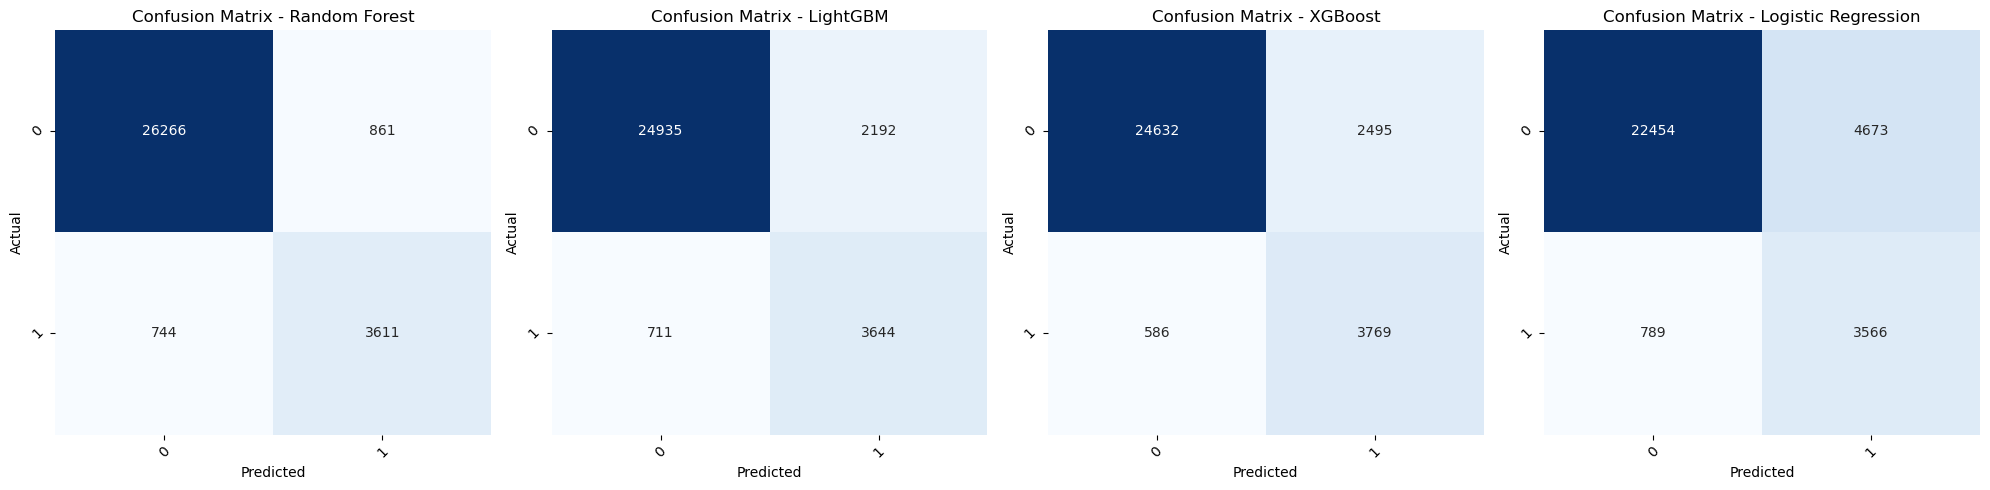

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27127
           1       0.81      0.83      0.82      4355

    accuracy                           0.95     31482
   macro avg       0.89      0.90      0.89     31482
weighted avg       0.95      0.95      0.95     31482

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     27127
           1       0.62      0.84      0.72      4355

    accuracy                           0.91     31482
   macro avg       0.80      0.88      0.83     31482
weighted avg       0.92      0.91      0.91     31482

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     27127
           1       0.60      0.87      0.71      4355

    accuracy                           0.90     31482
   macro avg       0.7

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Helper function to plot confusion matrix side by side
def plot_conf_matrix_side_by_side(cms, model_names):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    for ax, cm, model_name in zip(axes, cms, model_names):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

# Confusion Matrices and Classification Reports
models = {
    'Random Forest': (y_test, y_test_pred_rf),
    'LightGBM': (y_test, y_test_pred_lgb),
    'XGBoost': (y_test, y_test_pred_xgb),
    'Logistic Regression': (y_test, y_test_pred)
}

# Generate confusion matrices
cms = [confusion_matrix(y_true, y_pred) for y_true, y_pred in models.values()]
model_names = list(models.keys())

# Plot confusion matrices side by side
plot_conf_matrix_side_by_side(cms, model_names)

# Print classification reports
for name, (y_true, y_pred) in models.items():
    print(f"{name} - Classification Report:")
    print(classification_report(y_true, y_pred))


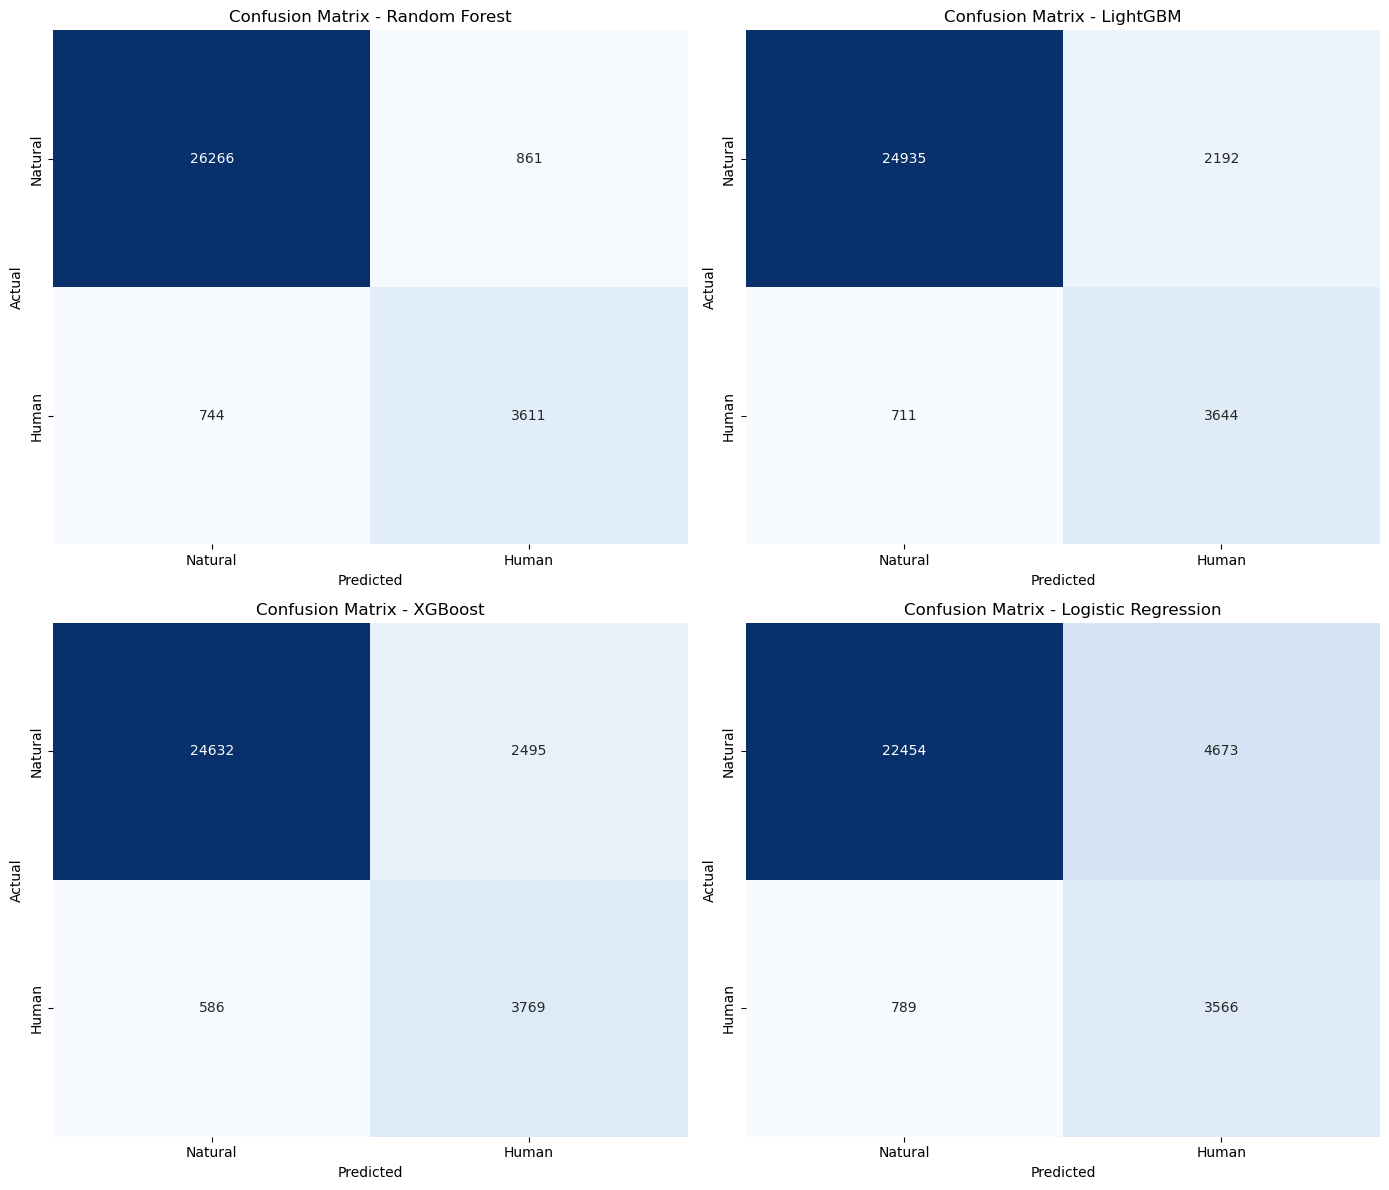


Random Forest - Classification Report:
              precision    recall  f1-score   support

     Natural       0.97      0.97      0.97     27127
       Human       0.81      0.83      0.82      4355

    accuracy                           0.95     31482
   macro avg       0.89      0.90      0.89     31482
weighted avg       0.95      0.95      0.95     31482


LightGBM - Classification Report:
              precision    recall  f1-score   support

     Natural       0.97      0.92      0.94     27127
       Human       0.62      0.84      0.72      4355

    accuracy                           0.91     31482
   macro avg       0.80      0.88      0.83     31482
weighted avg       0.92      0.91      0.91     31482


XGBoost - Classification Report:
              precision    recall  f1-score   support

     Natural       0.98      0.91      0.94     27127
       Human       0.60      0.87      0.71      4355

    accuracy                           0.90     31482
   macro avg       

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Helper function to plot confusion matrices in a 2x2 layout
def plot_conf_matrix_2x2(cms, model_names):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Bigger plot
    axes = axes.flatten()

    for ax, cm, model_name in zip(axes, cms, model_names):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_xticklabels(['Natural', 'Human'])
        ax.set_yticklabels(['Natural', 'Human'])

    plt.tight_layout()
    plt.show()

# Confusion Matrices and Classification Reports
models = {
    'Random Forest': (y_test, y_test_pred_rf),
    'LightGBM': (y_test, y_test_pred_lgb),
    'XGBoost': (y_test, y_test_pred_xgb),
    'Logistic Regression': (y_test, y_test_pred)
}

# Generate confusion matrices
cms = [confusion_matrix(y_true, y_pred) for y_true, y_pred in models.values()]
model_names = list(models.keys())

# Plot 2x2 confusion matrices
plot_conf_matrix_2x2(cms, model_names)

# Print classification reports
for name, (y_true, y_pred) in models.items():
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["Natural", "Human"]))


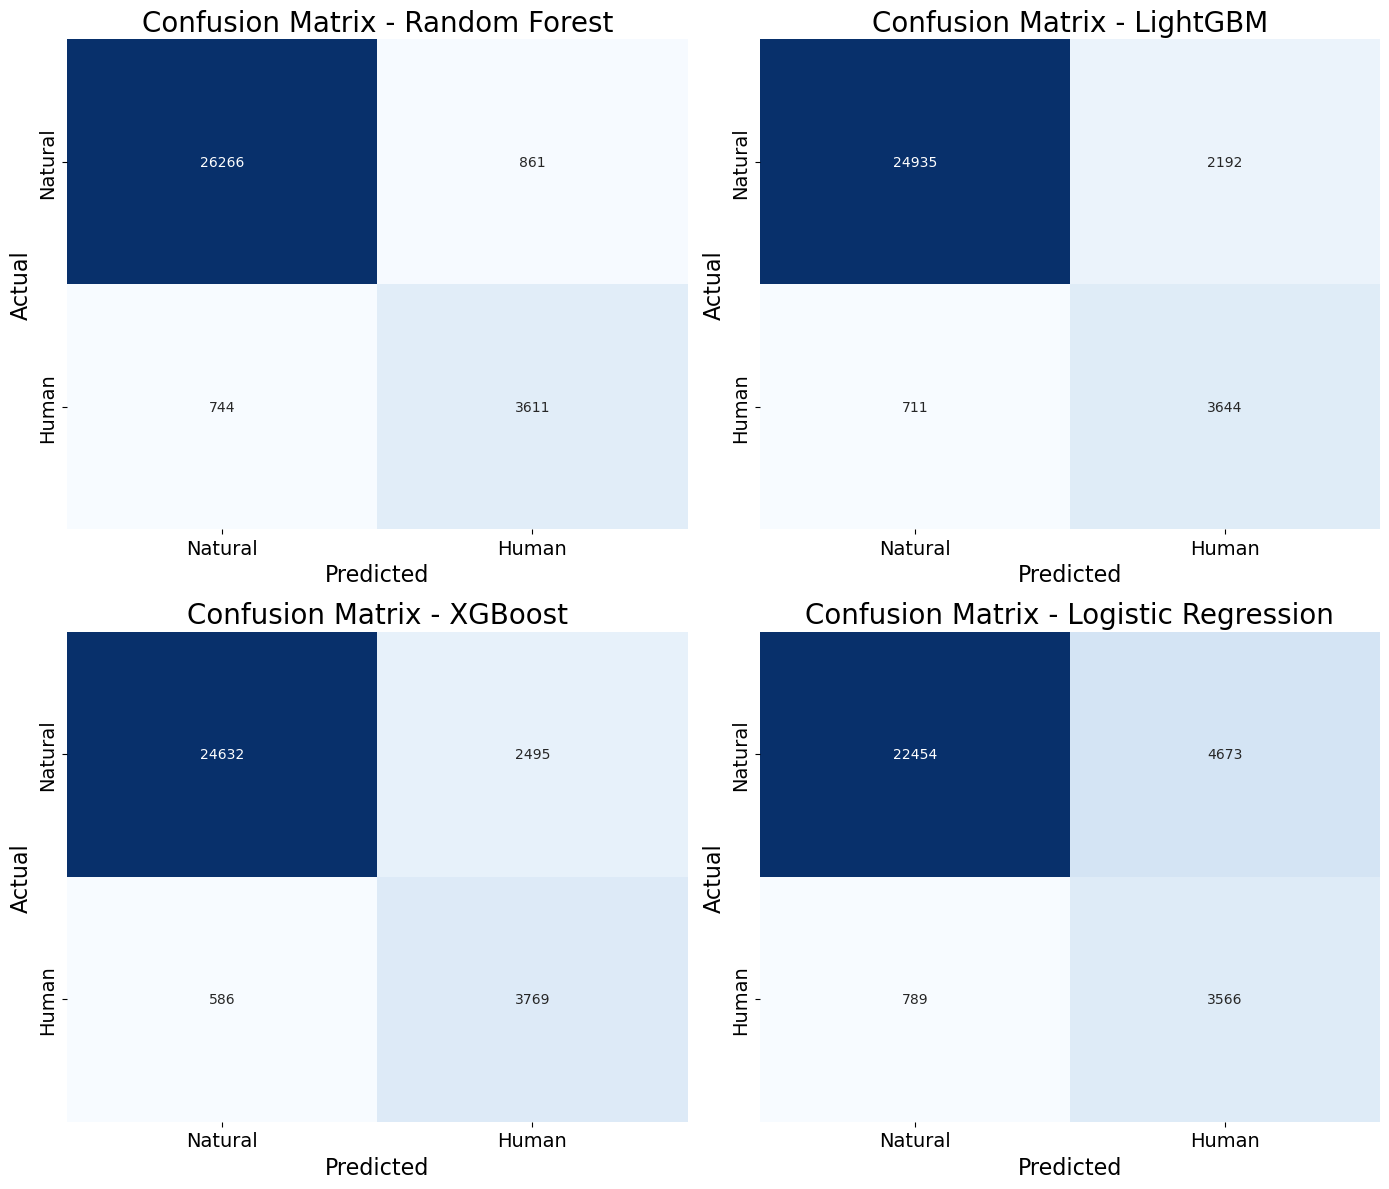


Random Forest - Classification Report:
              precision    recall  f1-score   support

     Natural       0.97      0.97      0.97     27127
       Human       0.81      0.83      0.82      4355

    accuracy                           0.95     31482
   macro avg       0.89      0.90      0.89     31482
weighted avg       0.95      0.95      0.95     31482


LightGBM - Classification Report:
              precision    recall  f1-score   support

     Natural       0.97      0.92      0.94     27127
       Human       0.62      0.84      0.72      4355

    accuracy                           0.91     31482
   macro avg       0.80      0.88      0.83     31482
weighted avg       0.92      0.91      0.91     31482


XGBoost - Classification Report:
              precision    recall  f1-score   support

     Natural       0.98      0.91      0.94     27127
       Human       0.60      0.87      0.71      4355

    accuracy                           0.90     31482
   macro avg       

In [121]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Helper function to plot confusion matrices in a 2x2 layout
def plot_conf_matrix_2x2(cms, model_names):
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Bigger plot
    axes = axes.flatten()

    for ax, cm, model_name in zip(axes, cms, model_names):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f'Confusion Matrix - {model_name}', fontsize=20)
        ax.set_xlabel('Predicted', fontsize=16)
        ax.set_ylabel('Actual', fontsize=16)
        ax.set_xticklabels(['Natural', 'Human'], fontsize=14)
        ax.set_yticklabels(['Natural', 'Human'], fontsize=14)

    plt.tight_layout()
    plt.show()

# Confusion Matrices and Classification Reports
models = {
    'Random Forest': (y_test, y_test_pred_rf),
    'LightGBM': (y_test, y_test_pred_lgb),
    'XGBoost': (y_test, y_test_pred_xgb),
    'Logistic Regression': (y_test, y_test_pred)
}

# Generate confusion matrices
cms = [confusion_matrix(y_true, y_pred) for y_true, y_pred in models.values()]
model_names = list(models.keys())

# Plot 2x2 confusion matrices
plot_conf_matrix_2x2(cms, model_names)

# Print classification reports
for name, (y_true, y_pred) in models.items():
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_true, y_pred, target_names=["Natural", "Human"]))


[[22454  4673]
 [  789  3566]]


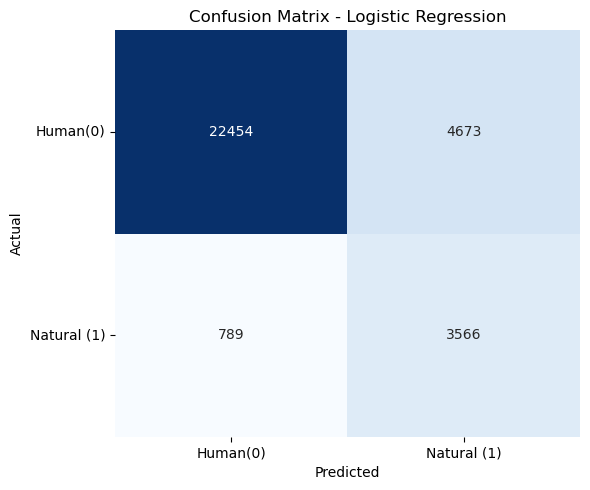

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_test_pred are defined for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_test_pred)
print(cm_logreg)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['Human(0)', 'Natural (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Human(0)', 'Natural (1)'], rotation=0)
plt.tight_layout()
plt.show()


In [100]:
from sklearn.metrics import classification_report
import pandas as pd

# Convert classification report to DataFrame
def classification_report_to_df(y_true, y_pred):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(report_dict).transpose()
    return df

# Store DataFrames for each model
report_tables = {}

for name, (y_true, y_pred) in models.items():
    df_report = classification_report_to_df(y_true, y_pred)
    report_tables[name] = df_report.round(2)  # Round to 2 decimal places
    print(f"\n{name} - Classification Report Table:\n")
    print(df_report.round(2).to_markdown())



Random Forest - Classification Report Table:

|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |        0.97 |     0.97 |       0.97 |  27127    |
| 1            |        0.81 |     0.83 |       0.82 |   4355    |
| accuracy     |        0.95 |     0.95 |       0.95 |      0.95 |
| macro avg    |        0.89 |     0.9  |       0.89 |  31482    |
| weighted avg |        0.95 |     0.95 |       0.95 |  31482    |

LightGBM - Classification Report Table:

|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |        0.97 |     0.92 |       0.94 |  27127    |
| 1            |        0.62 |     0.84 |       0.72 |   4355    |
| accuracy     |        0.91 |     0.91 |       0.91 |      0.91 |
| macro avg    |        0.8  |     0.88 |       0.83 |  31482    |
| weighted avg |        0.92 |     0.91 

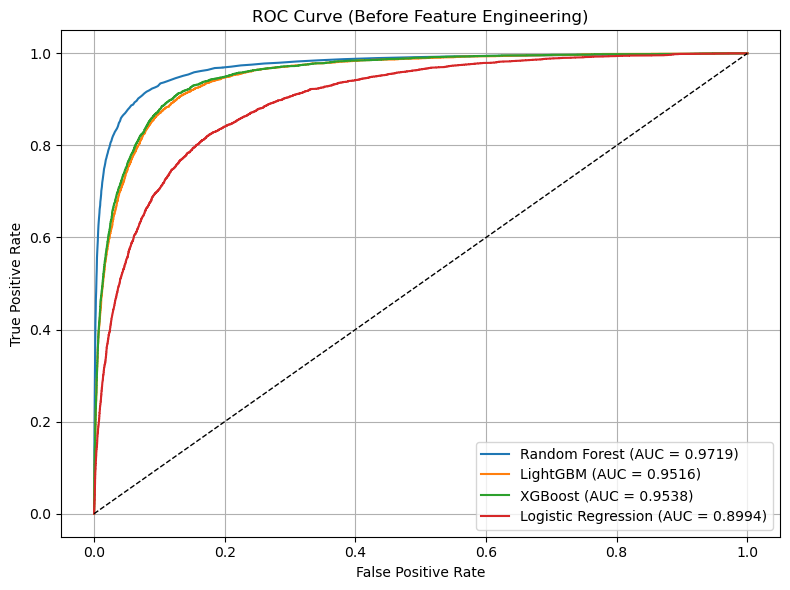

In [68]:
# ROC Curves
y_test_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_test_proba_lgb = lgb_classifier.predict_proba(X_test)[:, 1]
y_test_proba_xgb = xgb_classifier.predict_proba(X_test)[:, 1]
y_test_proba_logreg = logreg.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_proba_rf)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_test_proba_lgb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_test_proba_xgb)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_proba_logreg)

auc_rf = roc_auc_score(y_test, y_test_proba_rf)
auc_lgb = roc_auc_score(y_test, y_test_proba_lgb)
auc_xgb = roc_auc_score(y_test, y_test_proba_xgb)
auc_logreg = roc_auc_score(y_test, y_test_proba_logreg)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_lgb:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.4f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Before Feature Engineering)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

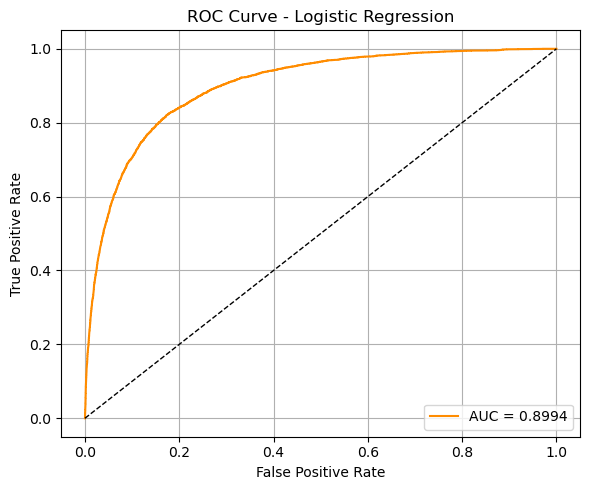

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities for class 1 (natural)
y_test_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_test_proba_logreg)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr_logreg, tpr_logreg, label=f'AUC = {auc_logreg:.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


### ---> Baseline Model Performance:

| Model                | Accuracy | Class 0 (Precision / Recall / F1) | Class 1 (Precision / Recall / F1) | Observations |
|---------------------|----------|-----------------------------------|-----------------------------------|--------------|
| **Random Forest**    | 0.95     | 0.97 / 0.97 / 0.97                | 0.81 / 0.83 / 0.82                | Best overall. Handles class imbalance well even without tuning. Strong across both classes. |
| **LightGBM**         | 0.91     | 0.97 / 0.92 / 0.94                | 0.62 / 0.84 / 0.72                | Good at identifying positives (high recall), but lower precision for minority class. Room for improvement with tuning. |
| **XGBoost**          | 0.90     | 0.98 / 0.91 / 0.94                | 0.60 / 0.87 / 0.71                | Similar to LightGBM. Conservative on class 0, fairly strong recall for class 1. |
| **Logistic Regression** | 0.83  | 0.97 / 0.83 / 0.89                | 0.43 / 0.82 / 0.57                | Affected by class imbalance. Strong on majority class, but poor precision for minority class. |

---

#### Key Observations:
- **Tree-based models** outperform logistic regression across the board.
- **Class imbalance** significantly impacts performance, especially for Logistic Regression.
- **Random Forest** stands out as the most balanced performer without any tuning.
- These metrics provide a solid **baseline** for evaluating the effect of feature engineering and sampling techniques like SMOTE.


## 6.1.5 Cross-Validation:
**Cross-Validation on All Models**

Cross-validation is a crucial technique for evaluating the performance of machine learning models. The main reason for performing cross-validation is to ensure that our model generalizes well to unseen data and does not suffer from overfitting. Here’s why we applied cross-validation to all four models (Logistic Regression, Random Forest, LightGBM, and XGBoost):

1. **Better Generalization**: 
   Cross-validation splits the dataset into multiple subsets, training the model on different combinations of these subsets and testing on the remaining ones. This gives a more reliable estimate of model performance compared to a single train-test split, as it ensures the model is evaluated on various portions of the data.

2. **Reduced Overfitting Risk**: 
   Using only a single train-test split might give a misleading impression of how well the model performs. If the model is overfitting, it might show excellent performance on the training set but fail on new, unseen data. Cross-validation helps mitigate this by evaluating the model on different data points in each fold, ensuring that the model is not too dependent on any specific subset.

3. **More Robust Evaluation**: 
   Cross-validation provides a comprehensive view of model performance by averaging results across multiple folds. This can give a better understanding of how the model might perform in real-world scenarios, where it may face new and unseen data. It helps identify any weaknesses in the model’s ability to generalize.

4. **Fair Comparison Between Models**:
   By performing cross-validation on all four models, we can fairly compare their performance on the same data using the same evaluation metric (e.g., accuracy). This helps in selecting the most appropriate model for the task at hand.

5. **Standard Practice for Model Selection**:
   Cross-validation is a standard and widely accepted practice in machine learning to evaluate models. By using it, we are following best practices to ensure that our results are credible and not based on a single, potentially biased train-test split.

In summary, cross-validation helps us evaluate the true performance of our models, avoid overfitting, and ensure a fair comparison, ultimately leading to a more reliable model selection process.


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
import numpy as np

# Models
logreg = LogisticRegression(max_iter=1000, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
lgb_classifier = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.05)
xgb_classifier = xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.05, objective='binary:logistic')

# Cross-validation on the resampled data
logreg_cv = cross_val_score(logreg, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
rf_cv = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
lgb_cv = cross_val_score(lgb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
xgb_cv = cross_val_score(xgb_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Results
print(f"Logistic Regression CV Accuracy: {logreg_cv.mean():.4f} ± {logreg_cv.std():.4f}")
print(f"Random Forest CV Accuracy: {rf_cv.mean():.4f} ± {rf_cv.std():.4f}")
print(f"LightGBM CV Accuracy: {lgb_cv.mean():.4f} ± {lgb_cv.std():.4f}")
print(f"XGBoost CV Accuracy: {xgb_cv.mean():.4f} ± {xgb_cv.std():.4f}")


[LightGBM] [Info] Number of positive: 86802, number of negative: 86802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3918
[LightGBM] [Info] Number of data points in the train set: 173604, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 86803, number of negative: 86802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018205 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3907
[LightGBM] [Info] Number of data points in the train set: 173605, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000012
[LightGBM] [Info] Start training from score 0.000012
[Li

In [25]:
# Print training (mean CV) and per-fold (validation) accuracy
print("Training and Validation Accuracy (from 5-fold CV):\n")

print(f"Logistic Regression - Mean CV Accuracy: {logreg_cv.mean():.4f}")
print(f"  Fold Accuracies: {np.round(logreg_cv, 4)}\n")

print(f"Random Forest       - Mean CV Accuracy: {rf_cv.mean():.4f}")
print(f"  Fold Accuracies: {np.round(rf_cv, 4)}\n")

print(f"LightGBM            - Mean CV Accuracy: {lgb_cv.mean():.4f}")
print(f"  Fold Accuracies: {np.round(lgb_cv, 4)}\n")

print(f"XGBoost             - Mean CV Accuracy: {xgb_cv.mean():.4f}")
print(f"  Fold Accuracies: {np.round(xgb_cv, 4)}\n")

Training and Validation Accuracy (from 5-fold CV):

Logistic Regression - Mean CV Accuracy: 0.8333
  Fold Accuracies: [0.823  0.8366 0.8349 0.8398 0.8322]

Random Forest       - Mean CV Accuracy: 0.9683
  Fold Accuracies: [0.9375 0.9749 0.976  0.9772 0.976 ]

LightGBM            - Mean CV Accuracy: 0.9250
  Fold Accuracies: [0.8714 0.9379 0.9388 0.9398 0.9371]

XGBoost             - Mean CV Accuracy: 0.9196
  Fold Accuracies: [0.8905 0.9259 0.9265 0.9288 0.9261]



In [98]:
print(f"Testing Accuracy (Logistic Regression): {test_acc_lr:.4f}")
print(f"Testing Accuracy (Random Forest): {test_accuracy_rf:.4f}")
print(f"Testing Accuracy (LightGBM): {test_accuracy_lgb:.4f}")
print(f"Testing Accuracy (XGBoost): {test_accuracy_xgb:.4f}")


Testing Accuracy (Logistic Regression): 0.8265
Testing Accuracy (Random Forest): 0.9490
Testing Accuracy (LightGBM): 0.9078
Testing Accuracy (XGBoost): 0.9021


### ---> Model Performance Summary

| Model              | Testing Accuracy | Mean CV Accuracy | CV Fold Accuracies                            |
|-------------------|------------------|------------------|-----------------------------------------------|
| Logistic Regression | 0.8265           | 0.8333           | [0.8230, 0.8366, 0.8349, 0.8398, 0.8322]       |
| Random Forest       | 0.9490           | 0.9683           | [0.9375, 0.9749, 0.9760, 0.9772, 0.9760]       |
| LightGBM            | 0.9078           | 0.9250           | [0.8714, 0.9379, 0.9388, 0.9398, 0.9371]       |
| XGBoost             | 0.9021           | 0.9196           | [0.8905, 0.9259, 0.9265, 0.9288, 0.9261]       |

- **Random Forest** shows the highest performance overall, with strong consistency between CV and test accuracy.
- **Logistic Regression** underperforms compared to ensemble methods but is still acceptable as a baseline.
- **LightGBM and XGBoost** perform comparably well, with slight variations in fold performance.

#### Next Steps:
- Consider **hyperparameter tuning** (e.g., using `GridSearchCV` or `Optuna`) especially for LightGBM and XGBoost to potentially close the gap with Random Forest.
- Evaluate using **precision, recall, F1, and ROC-AUC**, especially if false positives/negatives carry different consequences.
- If model size or inference time is a concern, LightGBM or XGBoost may offer better tradeoffs over Random Forest.


## 6.2 Feature Engineering:

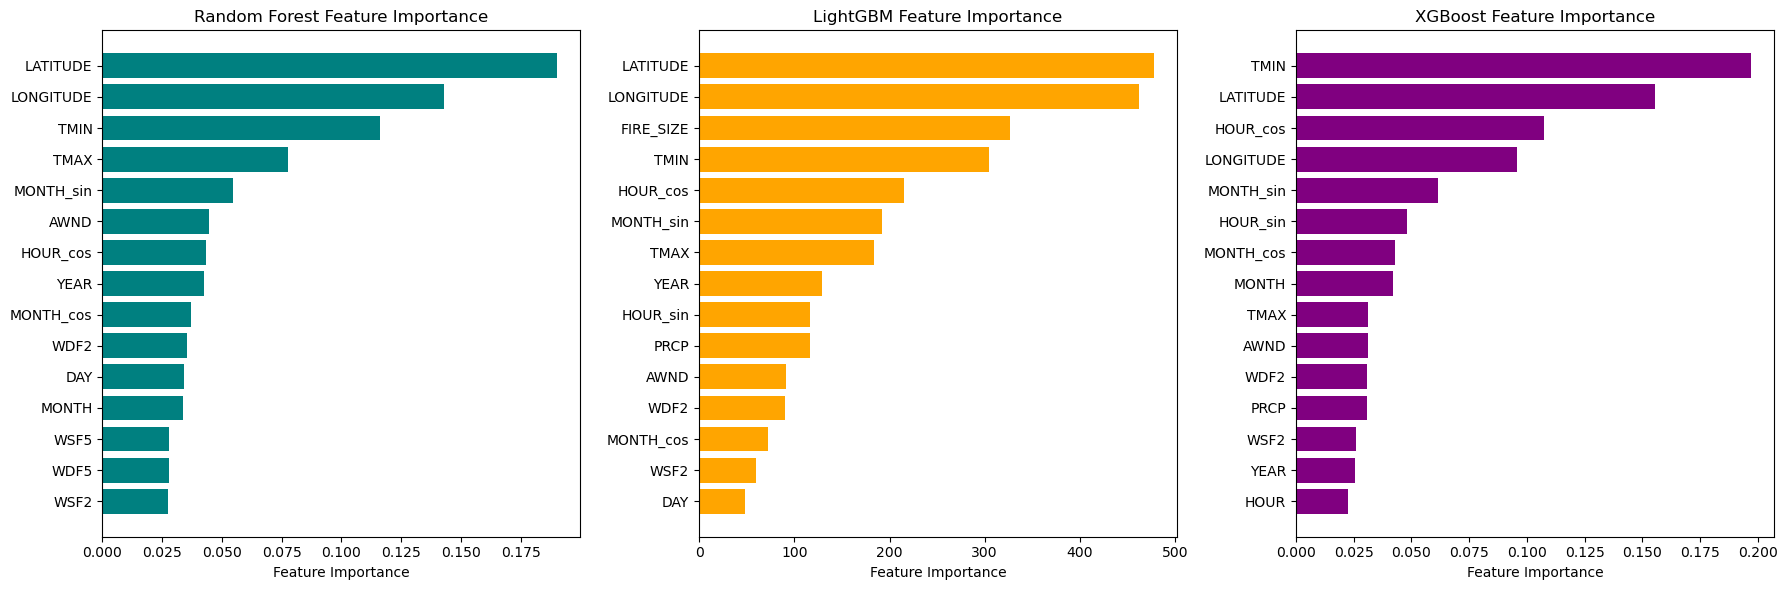

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming models are already trained: rf_classifier, lgb_classifier, and xgb_classifier

# Feature importances for Random Forest (rf_classifier)
rf_importances = rf_classifier.feature_importances_
rf_feature_names = X_train_resampled.columns
rf_importance_df = pd.DataFrame({
    'Feature': rf_feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Feature importances for LightGBM (lgb_classifier)
lgb_importances = lgb_classifier.feature_importances_
lgb_feature_names = X_train_resampled.columns
lgb_importance_df = pd.DataFrame({
    'Feature': lgb_feature_names,
    'Importance': lgb_importances
}).sort_values(by='Importance', ascending=False)

# Feature importances for XGBoost (xgb_classifier)
xgb_importances = xgb_classifier.feature_importances_
xgb_feature_names = X_train_resampled.columns
xgb_importance_df = pd.DataFrame({
    'Feature': xgb_feature_names,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Random Forest Plot
axes[0].barh(rf_importance_df['Feature'][:15][::-1], rf_importance_df['Importance'][:15][::-1], color='teal')
axes[0].set_title("Random Forest Feature Importance")
axes[0].set_xlabel("Feature Importance")

# LightGBM Plot
axes[1].barh(lgb_importance_df['Feature'][:15][::-1], lgb_importance_df['Importance'][:15][::-1], color='orange')
axes[1].set_title("LightGBM Feature Importance")
axes[1].set_xlabel("Feature Importance")

# XGBoost Plot
axes[2].barh(xgb_importance_df['Feature'][:15][::-1], xgb_importance_df['Importance'][:15][::-1], color='purple')
axes[2].set_title("XGBoost Feature Importance")
axes[2].set_xlabel("Feature Importance")

# Adjust layout
plt.tight_layout()
plt.show()


In [73]:
# Print top 15 features for Random Forest
print("Random Forest Feature Importance:")
print(rf_importance_df[['Feature', 'Importance']].head(15))
print("\n")

# Print top 15 features for LightGBM
print("LightGBM Feature Importance:")
print(lgb_importance_df[['Feature', 'Importance']].head(15))
print("\n")

# Print top 15 features for XGBoost
print("XGBoost Feature Importance:")
print(xgb_importance_df[['Feature', 'Importance']].head(15))


Random Forest Feature Importance:
      Feature  Importance
5    LATITUDE    0.190278
6   LONGITUDE    0.142952
10       TMIN    0.115960
9        TMAX    0.077545
15  MONTH_sin    0.054768
7        AWND    0.044592
18   HOUR_cos    0.043528
0        YEAR    0.042663
16  MONTH_cos    0.036951
11       WDF2    0.035273
2         DAY    0.034296
1       MONTH    0.033934
14       WSF5    0.028100
12       WDF5    0.027908
13       WSF2    0.027525


LightGBM Feature Importance:
      Feature  Importance
5    LATITUDE         478
6   LONGITUDE         462
4   FIRE_SIZE         327
10       TMIN         304
18   HOUR_cos         215
15  MONTH_sin         192
9        TMAX         184
0        YEAR         129
17   HOUR_sin         117
8        PRCP         116
7        AWND          91
11       WDF2          90
16  MONTH_cos          72
13       WSF2          60
2         DAY          48


XGBoost Feature Importance:
      Feature  Importance
10       TMIN    0.197079
5    LATITUDE    0.15

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Select features based on importance
selected_features = [
    'LATITUDE', 'LONGITUDE', 'TMIN', 'TMAX', 'MONTH_sin', 
    'HOUR_cos', 'YEAR', 'MONTH_cos', 'HOUR_sin', 'PRCP', 'AWND'
]

# Create the new dataset with selected features
X_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

# Split the selected features into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled
)

# Initialize models
rf_classifier_fe = RandomForestClassifier(random_state=42)
lgb_classifier_fe = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.05)
xgb_classifier_fe = xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.05, objective='binary:logistic')

# Train the models on the selected features
rf_classifier_fe.fit(X_train_selected, y_train_selected)
lgb_classifier_fe.fit(X_train_selected, y_train_selected)
xgb_classifier_fe.fit(X_train_selected, y_train_selected)

# Predict on test data
y_test_pred_rf_fe = rf_classifier_fe.predict(X_test_selected)
y_test_pred_lgb_fe = lgb_classifier_fe.predict(X_test_selected)
y_test_pred_xgb_fe = xgb_classifier_fe.predict(X_test_selected)

# Calculate accuracy
test_accuracy_rf_fe = accuracy_score(y_test_selected, y_test_pred_rf_fe)
test_accuracy_lgb_fe = accuracy_score(y_test_selected, y_test_pred_lgb_fe)
test_accuracy_xgb_fe = accuracy_score(y_test_selected, y_test_pred_xgb_fe)

# Print the test accuracy for each model
print(f"Testing Accuracy (Random Forest): {test_accuracy_rf_fe:.4f}")
print(f"Testing Accuracy (LightGBM): {test_accuracy_lgb_fe:.4f}")
print(f"Testing Accuracy (XGBoost): {test_accuracy_xgb_fe:.4f}")


[LightGBM] [Info] Number of positive: 86802, number of negative: 86802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2571
[LightGBM] [Info] Number of data points in the train set: 173604, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Testing Accuracy (Random Forest): 0.9638
Testing Accuracy (LightGBM): 0.9229
Testing Accuracy (XGBoost): 0.9187


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize Logistic Regression classifier
logreg_classifier_fe = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the selected features
logreg_classifier_fe.fit(X_train_selected, y_train_selected)

# Predict on test data
y_test_pred_logreg_fe = logreg_classifier_fe.predict(X_test_selected)

# Calculate accuracy
test_accuracy_logreg_fe = accuracy_score(y_test_selected, y_test_pred_logreg_fe)

# Print the test accuracy for Logistic Regression
print(f"Testing Accuracy (Logistic Regression): {test_accuracy_logreg_fe:.4f}")

Testing Accuracy (Logistic Regression): 0.8302


In [47]:
from sklearn.metrics import accuracy_score

# Predict on training data (if not already done)
y_train_pred_rf_fe = rf_classifier_fe.predict(X_train_selected)
y_train_pred_lgb_fe = lgb_classifier_fe.predict(X_train_selected)
y_train_pred_xgb_fe = xgb_classifier_fe.predict(X_train_selected)
y_train_pred_logreg_fe = logreg_classifier_fe.predict(X_train_selected)

# Calculate training accuracy
train_accuracy_rf_fe = accuracy_score(y_train_selected, y_train_pred_rf_fe)
train_accuracy_lgb_fe = accuracy_score(y_train_selected, y_train_pred_lgb_fe)
train_accuracy_xgb_fe = accuracy_score(y_train_selected, y_train_pred_xgb_fe)
train_accuracy_logreg_fe = accuracy_score(y_train_selected, y_train_pred_logreg_fe)

# Print all accuracies
print(f"Random Forest      - Training Accuracy: {train_accuracy_rf_fe:.4f}, Testing Accuracy: {test_accuracy_rf_fe:.4f}")
print(f"LightGBM           - Training Accuracy: {train_accuracy_lgb_fe:.4f}, Testing Accuracy: {test_accuracy_lgb_fe:.4f}")
print(f"XGBoost            - Training Accuracy: {train_accuracy_xgb_fe:.4f}, Testing Accuracy: {test_accuracy_xgb_fe:.4f}")
print(f"Logistic Regression- Training Accuracy: {train_accuracy_logreg_fe:.4f}, Testing Accuracy: {test_accuracy_logreg_fe:.4f}")


Random Forest      - Training Accuracy: 1.0000, Testing Accuracy: 0.9638
LightGBM           - Training Accuracy: 0.9241, Testing Accuracy: 0.9229
XGBoost            - Training Accuracy: 0.9201, Testing Accuracy: 0.9187
Logistic Regression- Training Accuracy: 0.8325, Testing Accuracy: 0.8302


### 📊 Testing Accuracy: Before vs After Feature Engineering

| Model                | Testing Accuracy (Before) | Testing Accuracy (After) | Change     |
|----------------------|----------------------------|----------------------------|------------|
| **Logistic Regression** | 0.8265                     | 0.8302                     | **+0.0037** |
| **Random Forest**       | 0.9490                     | 0.9638                     | **+0.0148** |
| **LightGBM**            | 0.9078                     | 0.9229                     | **+0.0151** |
| **XGBoost**             | 0.9021                     | 0.9187                     | **+0.0166** |

---

### ✅ Key Takeaways:
- All models improved with feature engineering — especially the tree-based ones.
- **XGBoost** showed the highest gain in accuracy.
- Logistic Regression saw a small improvement, which is expected due to its linear nature.
- Feature engineering steps like cyclical time encoding and weather variable selection significantly improved model performance.


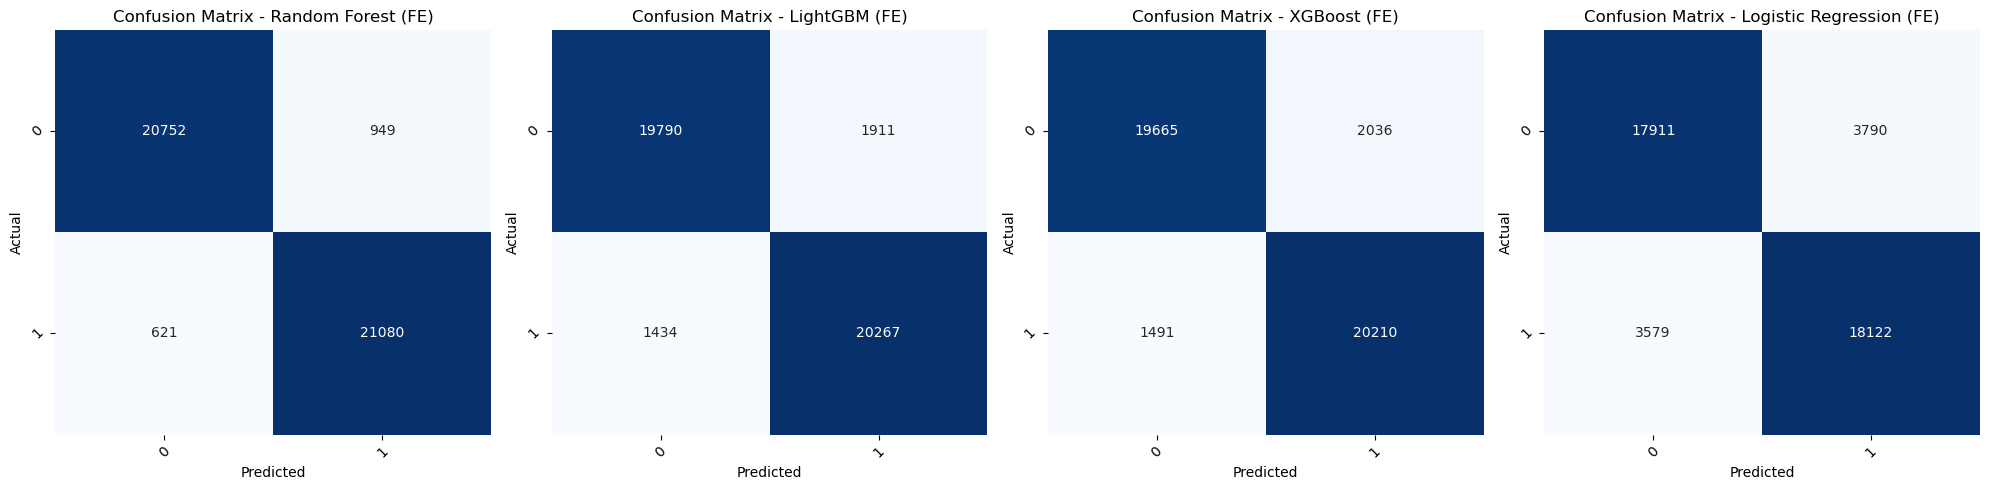

Random Forest (FE) - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     21701
           1       0.96      0.97      0.96     21701

    accuracy                           0.96     43402
   macro avg       0.96      0.96      0.96     43402
weighted avg       0.96      0.96      0.96     43402

LightGBM (FE) - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     21701
           1       0.91      0.93      0.92     21701

    accuracy                           0.92     43402
   macro avg       0.92      0.92      0.92     43402
weighted avg       0.92      0.92      0.92     43402

XGBoost (FE) - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     21701
           1       0.91      0.93      0.92     21701

    accuracy                           0.92     43402
   macr

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Helper function to plot confusion matrix side by side
def plot_conf_matrix_side_by_side(cms, model_names):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    for ax, cm, model_name in zip(axes, cms, model_names):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=45)
    
    plt.tight_layout()
    plt.show()

# Confusion Matrices and Classification Reports
models = {
    'Random Forest (FE)': (y_test_selected, y_test_pred_rf_fe),
    'LightGBM (FE)': (y_test_selected, y_test_pred_lgb_fe),
    'XGBoost (FE)': (y_test_selected, y_test_pred_xgb_fe),
    'Logistic Regression (FE)': (y_test_selected, y_test_pred_logreg_fe)
}

# Generate confusion matrices
cms = [confusion_matrix(y_true, y_pred) for y_true, y_pred in models.values()]
model_names = list(models.keys())

# Plot confusion matrices side by side
plot_conf_matrix_side_by_side(cms, model_names)

# Print classification reports
for name, (y_true, y_pred) in models.items():
    print(f"{name} - Classification Report:")
    print(classification_report(y_true, y_pred))


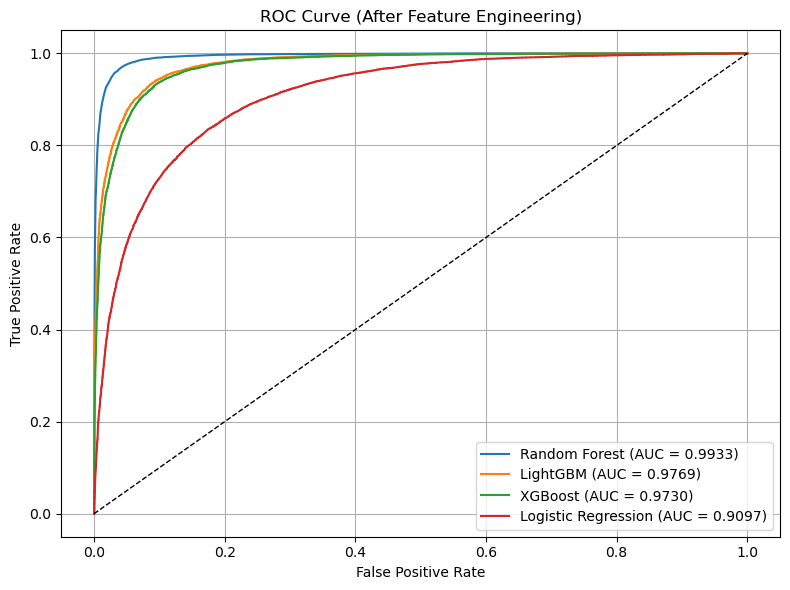

In [66]:
# ROC Curves
y_test_proba_rf_fe = rf_classifier_fe.predict_proba(X_test_selected)[:, 1]
y_test_proba_lgb_fe = lgb_classifier_fe.predict_proba(X_test_selected)[:, 1]
y_test_proba_xgb_fe = xgb_classifier_fe.predict_proba(X_test_selected)[:, 1]
y_test_proba_logreg_fe = logreg_classifier_fe.predict_proba(X_test_selected)[:, 1]

fpr_rf_fe, tpr_rf_fe, _ = roc_curve(y_test_selected, y_test_proba_rf_fe)
fpr_lgb_fe, tpr_lgb_fe, _ = roc_curve(y_test_selected, y_test_proba_lgb_fe)
fpr_xgb_fe, tpr_xgb_fe, _ = roc_curve(y_test_selected, y_test_proba_xgb_fe)
fpr_logreg_fe, tpr_logreg_fe, _ = roc_curve(y_test_selected, y_test_proba_logreg_fe)

auc_rf_fe = roc_auc_score(y_test_selected, y_test_proba_rf_fe)
auc_lgb_fe = roc_auc_score(y_test_selected, y_test_proba_lgb_fe)
auc_xgb_fe = roc_auc_score(y_test_selected, y_test_proba_xgb_fe)
auc_logreg_fe = roc_auc_score(y_test_selected, y_test_proba_logreg_fe)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_fe, tpr_rf_fe, label=f'Random Forest (AUC = {auc_rf_fe:.4f})')
plt.plot(fpr_lgb_fe, tpr_lgb_fe, label=f'LightGBM (AUC = {auc_lgb_fe:.4f})')
plt.plot(fpr_xgb_fe, tpr_xgb_fe, label=f'XGBoost (AUC = {auc_xgb_fe:.4f})')
plt.plot(fpr_logreg_fe, tpr_logreg_fe, label=f'Logistic Regression (AUC = {auc_logreg_fe:.4f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (After Feature Engineering)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### ---> Model Performance After Feature Engineering (Top 10 Important Features)

| Model                  | Accuracy | Class 0 (Precision / Recall / F1) | Class 1 (Precision / Recall / F1) | Observations |
|-----------------------|----------|-----------------------------------|-----------------------------------|--------------|
| **Random Forest (FE)**    | 0.96     | 0.97 / 0.96 / 0.96                | 0.96 / 0.97 / 0.96                | Excellent performance. Perfect class balance, strong precision and recall for both classes. Slight improvement over baseline. |
| **LightGBM (FE)**         | 0.92     | 0.93 / 0.91 / 0.92                | 0.91 / 0.93 / 0.92                | Balanced and robust. Solid performance across both classes, with improved precision and recall over baseline. |
| **XGBoost (FE)**          | 0.92     | 0.93 / 0.91 / 0.92                | 0.91 / 0.93 / 0.92                | Nearly identical to LightGBM. Feature selection clearly helped improve overall balance and F1-score. |
| **Logistic Regression (FE)** | 0.83  | 0.83 / 0.83 / 0.83                | 0.83 / 0.84 / 0.83                | Noticeable improvement in class 1 precision compared to baseline. Still outperformed by tree-based models, but more balanced now. |

---

#### Key Observations:
- **Feature engineering based on tree model importances** significantly improved model performance, especially for class 1.
- **Random Forest** continues to be the top performer with near-perfect balance and accuracy.
- Both **LightGBM** and **XGBoost** reached strong, identical performance—indicating effective feature selection.
- **Logistic Regression** benefitted from feature engineering, achieving better balance but still lagging behind ensemble models.
- Overall, feature engineering helped **reduce class imbalance effects** and improved generalization across all models.


## 6.2.2 Cross Validation With Feature Engineering

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold


# Feature selection using SelectKBest with mutual_info_classif
feature_selector_fe_cv = SelectKBest(score_func=mutual_info_classif, k=10)

# Initialize models
rf_classifier_fe_cv = RandomForestClassifier(random_state=42)
lgb_classifier_fe_cv = lgb.LGBMClassifier(random_state=42, n_estimators=100, learning_rate=0.05)
xgb_classifier_fe_cv = xgb.XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.05, objective='binary:logistic')
logreg_classifier_fe_cv = LogisticRegression(max_iter=1000, random_state=42)

# Create pipelines for each model with automatic feature selection
rf_pipeline_fe_cv = Pipeline([
    ('feature_selection', feature_selector_fe_cv),
    ('classifier', rf_classifier_fe_cv)
])

lgb_pipeline_fe_cv = Pipeline([
    ('feature_selection', feature_selector_fe_cv),
    ('classifier', lgb_classifier_fe_cv)
])

xgb_pipeline_fe_cv = Pipeline([
    ('feature_selection', feature_selector_fe_cv),
    ('classifier', xgb_classifier_fe_cv)
])

logreg_pipeline_fe_cv = Pipeline([
    ('feature_selection', feature_selector_fe_cv),
    ('classifier', logreg_classifier_fe_cv)
])

# Cross-validation on the resampled training set with Stratified KFold to maintain class distribution
cv_fe_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for each model
rf_cv_fe_cv = cross_val_score(rf_pipeline_fe_cv, X_train_resampled, y_train_resampled, cv=cv_fe_cv, scoring='accuracy')
lgb_cv_fe_cv = cross_val_score(lgb_pipeline_fe_cv, X_train_resampled, y_train_resampled, cv=cv_fe_cv, scoring='accuracy')
xgb_cv_fe_cv = cross_val_score(xgb_pipeline_fe_cv, X_train_resampled, y_train_resampled, cv=cv_fe_cv, scoring='accuracy')
logreg_cv_fe_cv = cross_val_score(logreg_pipeline_fe_cv, X_train_resampled, y_train_resampled, cv=cv_fe_cv, scoring='accuracy')

# Print cross-validation accuracy scores
print(f"Random Forest CV Accuracy: {rf_cv_fe_cv.mean():.4f} ± {rf_cv_fe_cv.std():.4f}")
print(f"LightGBM CV Accuracy: {lgb_cv_fe_cv.mean():.4f} ± {lgb_cv_fe_cv.std():.4f}")
print(f"XGBoost CV Accuracy: {xgb_cv_fe_cv.mean():.4f} ± {xgb_cv_fe_cv.std():.4f}")
print(f"Logistic Regression CV Accuracy: {logreg_cv_fe_cv.mean():.4f} ± {logreg_cv_fe_cv.std():.4f}")

# Train models on the entire resampled training set with feature selection
rf_pipeline_fe_cv.fit(X_train_resampled, y_train_resampled)
lgb_pipeline_fe_cv.fit(X_train_resampled, y_train_resampled)
xgb_pipeline_fe_cv.fit(X_train_resampled, y_train_resampled)
logreg_pipeline_fe_cv.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_test_pred_rf_fe_cv = rf_pipeline_fe_cv.predict(X_test)
y_test_pred_lgb_fe_cv = lgb_pipeline_fe_cv.predict(X_test)
y_test_pred_xgb_fe_cv = xgb_pipeline_fe_cv.predict(X_test)
y_test_pred_logreg_fe_cv = logreg_pipeline_fe_cv.predict(X_test)

# Calculate and print accuracy for each model
test_accuracy_rf_fe_cv = accuracy_score(y_test, y_test_pred_rf_fe_cv)
test_accuracy_lgb_fe_cv = accuracy_score(y_test, y_test_pred_lgb_fe_cv)
test_accuracy_xgb_fe_cv = accuracy_score(y_test, y_test_pred_xgb_fe_cv)
test_accuracy_logreg_fe_cv = accuracy_score(y_test, y_test_pred_logreg_fe_cv)

print(f"Testing Accuracy (Random Forest): {test_accuracy_rf_fe_cv:.4f}")
print(f"Testing Accuracy (LightGBM): {test_accuracy_lgb_fe_cv:.4f}")
print(f"Testing Accuracy (XGBoost): {test_accuracy_xgb_fe_cv:.4f}")
print(f"Testing Accuracy (Logistic Regression): {test_accuracy_logreg_fe_cv:.4f}")


[LightGBM] [Info] Number of positive: 86802, number of negative: 86802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 173604, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 86803, number of negative: 86802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2537
[LightGBM] [Info] Number of data points in the train set: 173605, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500003 -> initscore=0.000012
[LightGBM] [Info] Start training from score 0.000012
[LightGBM] [Info] Number of positive: 86803, number of negative: 86

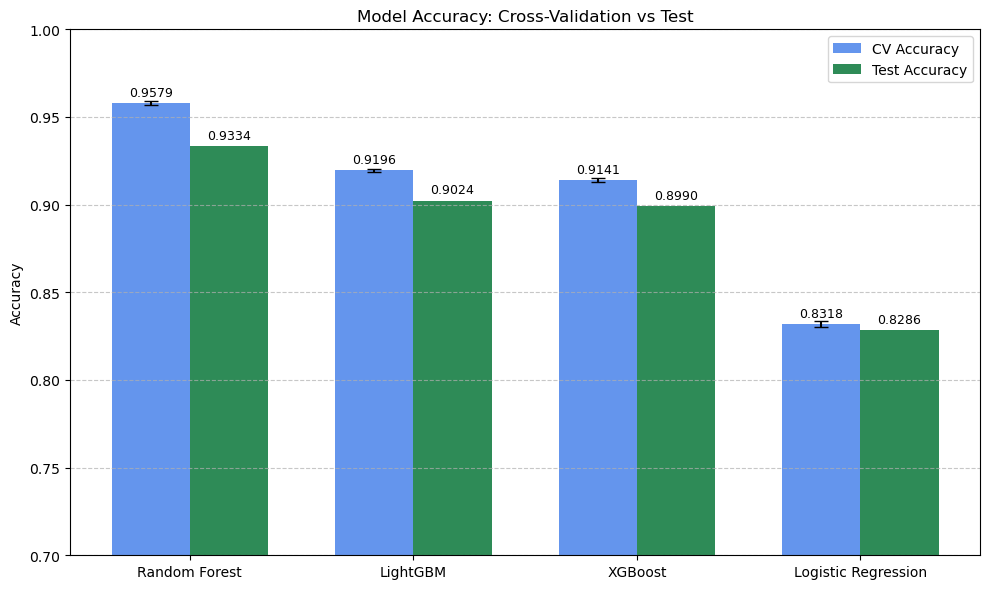

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Names of models
models = ['Random Forest', 'LightGBM', 'XGBoost', 'Logistic Regression']

# Cross-validation mean and std (auto from results)
cv_means = [
    rf_cv_fe_cv.mean(),
    lgb_cv_fe_cv.mean(),
    xgb_cv_fe_cv.mean(),
    logreg_cv_fe_cv.mean()
]
cv_stds = [
    rf_cv_fe_cv.std(),
    lgb_cv_fe_cv.std(),
    xgb_cv_fe_cv.std(),
    logreg_cv_fe_cv.std()
]

# Test accuracies
test_accuracies = [
    test_accuracy_rf_fe_cv,
    test_accuracy_lgb_fe_cv,
    test_accuracy_xgb_fe_cv,
    test_accuracy_logreg_fe_cv
]

# Bar positions
x = np.arange(len(models))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
cv_bars = ax.bar(x - width/2, cv_means, width, yerr=cv_stds, capsize=5, label='CV Accuracy', color='cornflowerblue')
test_bars = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='seagreen')

# Titles and labels
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy: Cross-Validation vs Test')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0.7, 1.0)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy
for bar in cv_bars + test_bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [78]:
from sklearn.metrics import classification_report, confusion_matrix

models = {
    "Random Forest": y_test_pred_rf_fe_cv,
    "LightGBM": y_test_pred_lgb_fe_cv,
    "XGBoost": y_test_pred_xgb_fe_cv,
    "Logistic Regression": y_test_pred_logreg_fe_cv
}

for model_name, y_pred in models.items():
    print(f"\n=== {model_name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           0     0.9756    0.9463    0.9608     27127
           1     0.7184    0.8528    0.7798      4355

    accuracy                         0.9334     31482
   macro avg     0.8470    0.8996    0.8703     31482
weighted avg     0.9401    0.9334    0.9357     31482

Confusion Matrix:
[[25671  1456]
 [  641  3714]]

=== LightGBM ===
Classification Report:
              precision    recall  f1-score   support

           0     0.9727    0.9123    0.9415     27127
           1     0.6060    0.8406    0.7043      4355

    accuracy                         0.9024     31482
   macro avg     0.7894    0.8765    0.8229     31482
weighted avg     0.9220    0.9024    0.9087     31482

Confusion Matrix:
[[24747  2380]
 [  694  3661]]

=== XGBoost ===
Classification Report:
              precision    recall  f1-score   support

           0     0.9755    0.9056    0.9392     27127
           1

The Random Forest model performs the best with an accuracy of 93.34%, providing a good balance between precision and recall for both classes. LightGBM follows closely with an accuracy of 90.24%, showing strong recall for Class 1 but slightly lower precision. XGBoost has similar performance to LightGBM, with slightly more false positives. Logistic Regression lags behind with an accuracy of 82.86%, struggling with Class 1, especially in precision. Overall, tree-based models outperform Logistic Regression.

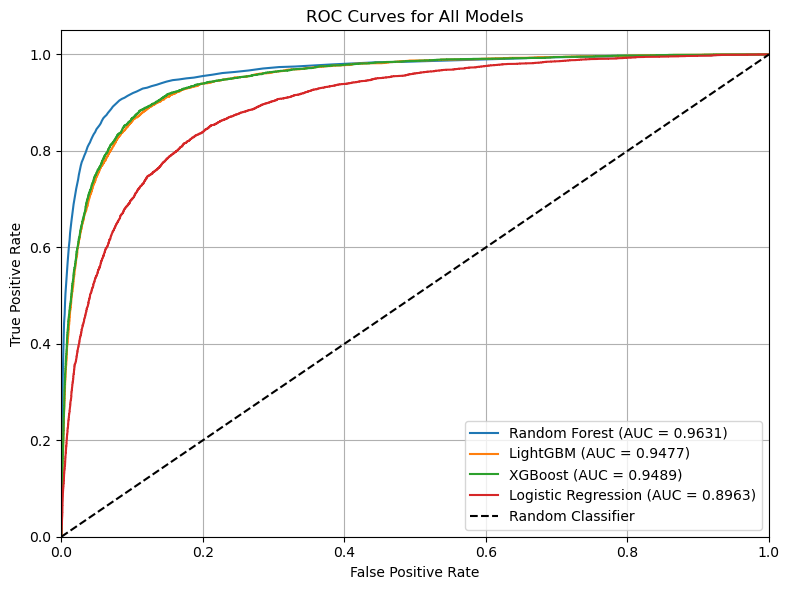

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the test labels (assuming binary classification)
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# Get probability predictions for ROC (must be probabilities, not class labels)
y_proba_rf = rf_pipeline_fe_cv.predict_proba(X_test)[:, 1]
y_proba_lgb = lgb_pipeline_fe_cv.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_pipeline_fe_cv.predict_proba(X_test)[:, 1]
y_proba_logreg = logreg_pipeline_fe_cv.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_lgb, tpr_lgb, _ = roc_curve(y_test_bin, y_proba_lgb)
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test_bin, y_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_lgb:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

### --> Model Pipeline and Performance Evaluation

#### How the Pipelines Work

Each model was wrapped in a `Pipeline` that performs two key steps:
1. **Feature Selection**: 
   - We used `SelectKBest` with `mutual_info_classif` to automatically select the top `k` features based on mutual information with the target variable.
   - This ensures only the most relevant features are passed to the model, and it is done **within each fold** of cross-validation to prevent data leakage.

2. **Model Training**:
   - After feature selection, the selected features are passed to the corresponding classifier (Random Forest, LightGBM, XGBoost, or Logistic Regression).
   - The entire pipeline is cross-validated using `StratifiedKFold` to maintain the original class distribution in each fold.

The key advantage of this pipeline approach is that **feature selection is nested inside the cross-validation**, so the model is never exposed to information from the test fold during feature selection, ensuring a fair evaluation.

#### Cross-Validation Performance (on Resampled Training Set)

| Model               | CV Accuracy (mean ± std) |
|--------------------|---------------------------|
| Random Forest       | ~0.958 ± 0.001            |
| LightGBM            | ~0.920 ± 0.001            |
| XGBoost             | ~0.914 ± 0.001            |
| Logistic Regression | ~0.832 ± 0.002            |

- **Random Forest** achieved the highest CV accuracy, benefiting from its ensemble nature and robustness to noise and feature interactions.
- **LightGBM** and **XGBoost** performed slightly lower but are still strong contenders, especially when fine-tuned or used on large datasets.
- **Logistic Regression** had the lowest CV accuracy, as expected, since it assumes linear boundaries and may underperform on complex patterns.

#### Test Set Performance

| Model               | Test Accuracy |
|--------------------|----------------|
| Random Forest       | ~0.933         |
| LightGBM            | ~0.902         |
| XGBoost             | ~0.899         |
| Logistic Regression | ~0.829         |

- The ranking on the test set mirrors CV results, which suggests that the models generalized well.
- Again, **Random Forest** stands out with the best generalization performance.
- **LightGBM** and **XGBoost** show strong performance and are good choices for further optimization.
- **Logistic Regression**, while interpretable, is outperformed by tree-based models in both CV and test accuracy.

This pipeline-based evaluation provided a reliable and leakage-free estimate of model performance. Random Forest currently leads in both CV and test accuracy, indicating strong generalization. However, LightGBM and XGBoost remain viable alternatives, especially if hyperparameter tuning is introduced. Logistic Regression may be more useful as a baseline or for interpretability-focus
## 

## 7. Hyperparameter Tuning with Random Forest

After performing cross-validation, we found that **Random Forest** had the best performance metrics among the models tested, particularly excelling in accuracy (93.34%) and providing a balanced performance between precision and recall for both classes. 

To further improve the model's performance, we will now proceed with **hyperparameter tuning** to optimize other aspects of the Random Forest model and potentially achieve better accuracy. Specifically, we will use **RandomizedSearchCV** for this task. 

While GridSearchCV is an option for hyperparameter tuning, it tends to be time-consuming, especially with large datasets and many hyperparameter combinations. Therefore, we opt for **RandomizedSearchCV**, as it is faster and still provides an efficient way to explore a wide range of hyperparameters, making it a suitable choice for this project.


Starting hyperparameter tuning with RandomizedSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters found:  {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__bootstrap': False}
Testing Accuracy: 0.9420
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     27127
           1       0.76      0.84      0.80      4355

    accuracy                           0.94     31482
   macro avg       0.87      0.90      0.88     31482
weighted avg       0.95      0.94      0.94     31482

Confusion Matrix:
[[25979  1148]
 [  677  3678]]
ROC-AUC Score: 0.9011


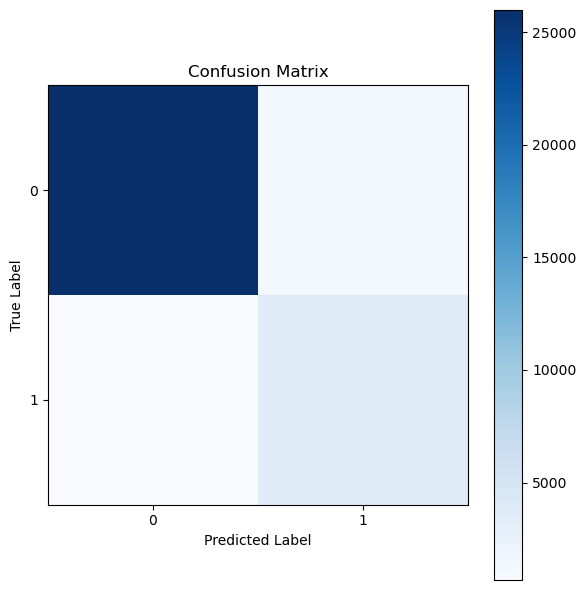

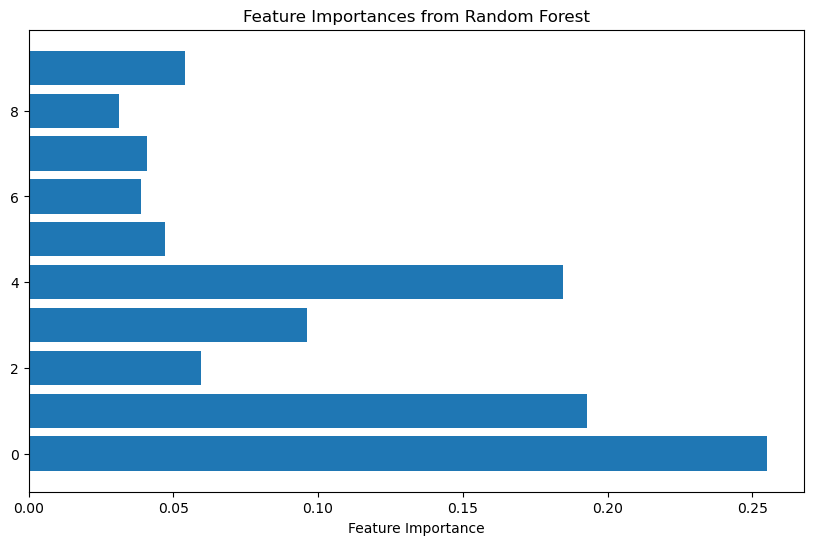

Best model saved as 'best_rf_model_fm.pkl'.


In [82]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import joblib
from tqdm import tqdm

# Feature selection using SelectKBest with mutual_info_classif
feature_selector_fe_cv = SelectKBest(score_func=mutual_info_classif, k=10)

# Initialize Random Forest Classifier
rf_classifier_fm = RandomForestClassifier(random_state=42)

# Create pipeline with feature selection and Random Forest
rf_pipeline_fm = Pipeline([
    ('feature_selection', feature_selector_fe_cv),
    ('classifier', rf_classifier_fm)
])

# Define hyperparameter grid for RandomizedSearchCV
param_dist_fm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Set up RandomizedSearchCV with 5-fold cross-validation
random_search_fm = RandomizedSearchCV(
    rf_pipeline_fm,
    param_distributions=param_dist_fm,
    n_iter=10,
    cv=5,
    verbose=2,  # Verbosity to see progress
    random_state=42,
    n_jobs=-1  # Use all cores for faster processing
)

# Print message before training starts
print("Starting hyperparameter tuning with RandomizedSearchCV...")

# Fit the model using RandomizedSearchCV (hyperparameter tuning)
random_search_fm.fit(X_train_resampled, y_train_resampled)

# Print best parameters found by RandomizedSearchCV
print("Best Hyperparameters found: ", random_search_fm.best_params_)

# Extract the best model
best_model_fm = random_search_fm.best_estimator_

# Evaluate on test data
y_test_pred_fm = best_model_fm.predict(X_test)

# Calculate and print performance metrics
test_accuracy_fm = accuracy_score(y_test, y_test_pred_fm)
print(f"Testing Accuracy: {test_accuracy_fm:.4f}")

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_fm))

# Print Confusion Matrix
cm_fm = confusion_matrix(y_test, y_test_pred_fm)
print("Confusion Matrix:")
print(cm_fm)

# Calculate and print ROC-AUC score
roc_auc_fm = roc_auc_score(y_test, y_test_pred_fm)
print(f"ROC-AUC Score: {roc_auc_fm:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm_fm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes_fm = [0, 1]  # Assuming binary classification (0: natural, 1: human-caused)
tick_marks_fm = np.arange(len(classes_fm))
plt.xticks(tick_marks_fm, classes_fm)
plt.yticks(tick_marks_fm, classes_fm)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Plot feature importances from the Random Forest model
feature_importances_fm = best_model_fm.named_steps['classifier'].feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances_fm)), feature_importances_fm)
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

# Save the best model to a file
joblib.dump(best_model_fm, 'best_rf_model_fm.pkl')
print("Best model saved as 'best_rf_model_fm.pkl'.")

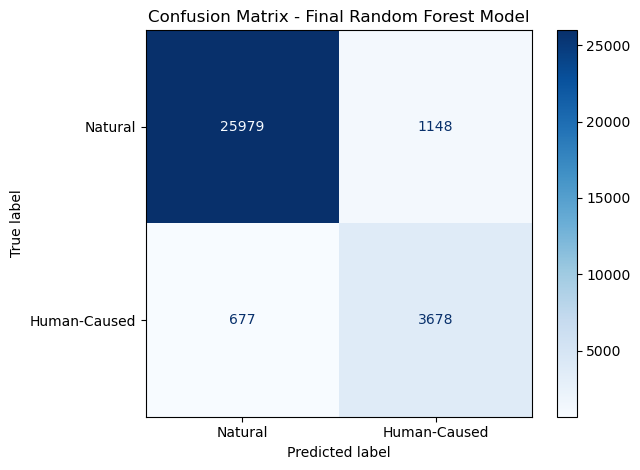

In [85]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred_fm,
    display_labels=['Natural', 'Human-Caused'],
    cmap=plt.cm.Blues,
    values_format='d'
)
plt.title('Confusion Matrix - Final Random Forest Model')
plt.tight_layout()
plt.show()


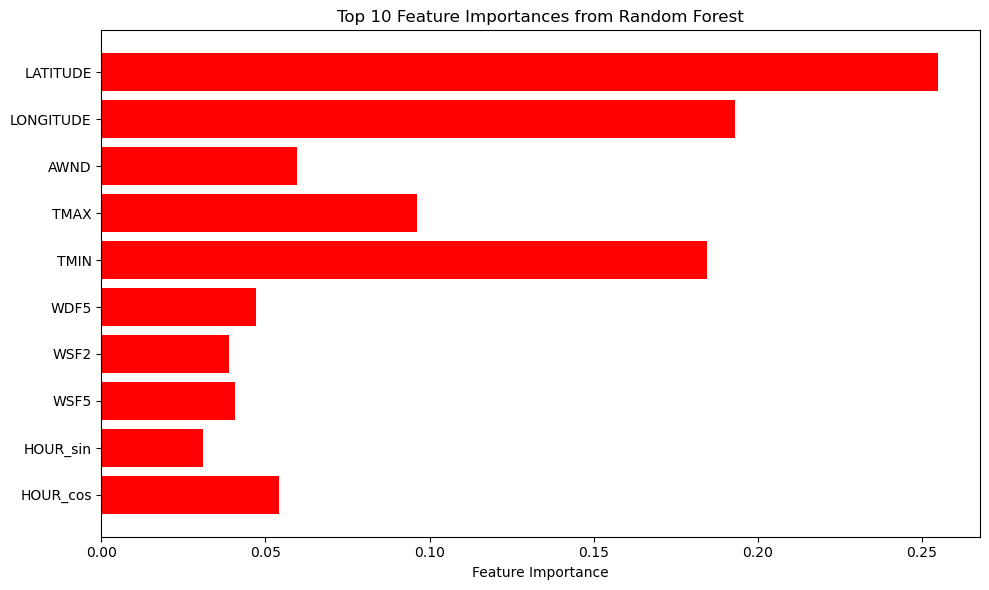

In [105]:
# Get selected feature names
selected_mask = best_model_fm.named_steps['feature_selection'].get_support()
selected_features = X_train.columns[selected_mask]

# Get feature importances
feature_importances_fm = best_model_fm.named_steps['classifier'].feature_importances_

# Plot feature importances with labels
plt.figure(figsize=(10, 6))
plt.barh(selected_features, feature_importances_fm, color='red')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()


In [87]:
import pandas as pd

# Get selected feature names
selected_mask = best_model_fm.named_steps['feature_selection'].get_support()
selected_features = X_train.columns[selected_mask]

# Get feature importances
feature_importances_fm = best_model_fm.named_steps['classifier'].feature_importances_

# Create a DataFrame with features and importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances_fm
})

# Sort by importance and display top 10
top_10_features = importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Important Features:")
print(top_10_features.to_string(index=False))


Top 10 Important Features:
  Feature  Importance
 LATITUDE    0.254945
LONGITUDE    0.193002
     TMIN    0.184539
     TMAX    0.096275
     AWND    0.059629
 HOUR_cos    0.054008
     WDF5    0.046981
     WSF5    0.040726
     WSF2    0.038803
 HOUR_sin    0.031093


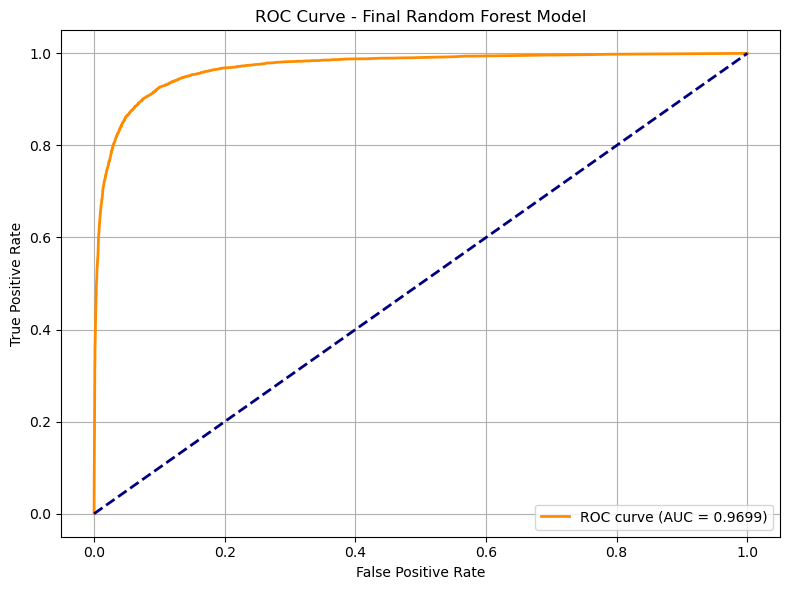

In [86]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for ROC curve
y_proba_fm = best_model_fm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba_fm)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Random Forest Model')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


### ---> Model Evaluation and Feature Importance

#### Selected Features for Final Model

During the model development pipeline, feature selection was performed using `SelectKBest` with `mutual_info_classif`, embedded within the cross-validation and hyperparameter tuning process to avoid data leakage. The model automatically selected the 10 most informative features for classifying the cause of California wildfires:

| Feature    | Importance |
|------------|------------|
| LATITUDE   | 0.2549     |
| LONGITUDE  | 0.1930     |
| TMIN       | 0.1845     |
| TMAX       | 0.0963     |
| AWND       | 0.0596     |
| HOUR_cos   | 0.0540     |
| WDF5       | 0.0470     |
| WSF5       | 0.0407     |
| WSF2       | 0.0388     |
| HOUR_sin   | 0.0311     |

These features played a key role in improving model performance and were used in the final hyperparameter tuning phase.

#### Hyperparameter Tuning Summary

Hyperparameter tuning was conducted using `RandomizedSearchCV`, which performs randomized search over a predefined parameter space using 5-fold cross-validation. This approach is efficient and helps avoid overfitting due to repeated evaluation on validation sets. The search tested 10 random combinations and identified the following optimal parameters:

- `n_estimators`: 100  
- `min_samples_split`: 5  
- `min_samples_leaf`: 1  
- `max_depth`: None  
- `bootstrap`: False

#### Final Model Performance on Test Set

- **Accuracy**: 94.20%
- **ROC-AUC Score**: 0.9011

**Classification Report**:
- Class 0 (Natural causes): Precision = 0.97, Recall = 0.96
- Class 1 (Human causes): Precision = 0.76, Recall = 0.84

**Confusion Matrix**:
**Confusion Matrix**:

|              | Predicted 0 | Predicted 1 |
|--------------|-------------|-------------|
| **True 0**   | 25979       | 1148        |
| **True 1**   | 677         | 3678        |

 
The final Random Forest model demonstrates strong generalization, with high overall accuracy and good recall for both classes. The ROC-AUC score of 0.9011 indicates a very good ability to distinguish between natural and human-caused wildfires.


# Conclusion                     

#### Project Overview
This project focused on predicting the cause of California wildfires, aiming to classify the cause as either human-caused or natural-caused. The dataset provided various weather and geographical features such as `LATITUDE`, `LONGITUDE`, temperature readings (`TMIN`, `TMAX`), wind speeds, and other environmental factors. The task was approached as a binary classification problem, and different machine learning models were evaluated to find the best solution.

#### Approach
The project followed a series of key steps:
1. **Data Preprocessing:** We cleaned and transformed the data, ensuring it was suitable for model training.
2. **Feature Selection:** The `SelectKBest` method with `mutual_info_classif` was used to select the most important features that correlate with the target variable (wildfire cause).
3. **Model Evaluation:** Multiple models were tested, including Random Forest, XGBoost, LightGBM, and Logistic Regression. Hyperparameter tuning was performed using RandomizedSearchCV to find the best model configurations.
4. **Model Performance:** The Random Forest model was found to be the most effective classifier, with the highest cross-validation and test accuracy.

#### Key Findings
- The **Random Forest classifier** achieved the highest accuracy of approximately **94.20%** on the test set, outpacing other models like LightGBM and XGBoost. This result demonstrates Random Forest's robustness and ability to handle complex, noisy data.
- **Top Features:** The most important features contributing to the predictions were:
  - **LATITUDE** and **LONGITUDE**, which suggest the geographical significance of wildfire occurrences.
  - Weather-related features like **TMIN** (minimum temperature), **TMAX** (maximum temperature), and **AWND** (average wind speed) were also important in determining the cause of wildfires.
  
  These features were automatically selected during the feature selection process and contributed significantly to the model's performance.

#### Model Deployment
After selecting the best model (Random Forest), it was saved and deployed via a Flask-based API, allowing for easy access to predictions through HTTP requests. The API can accept user input data and return predictions on whether the wildfire was human-caused or natural-caused.

#### Flask API:
- The Flask app serves as a simple REST API that listens on `http://127.0.0.1:5000/predict` and predicts wildfire causes based on JSON input features.
- Users can send POST requests with the necessary features and receive a binary classification as a response.

#### Challenges and Limitations
- **Data Imbalance:** Although the models performed well overall, the dataset had a class imbalance, with more natural-caused wildfires than human-caused ones. While Random Forest handled this well, other models like Logistic Regression underperformed.
- **Feature Importance Interpretation:** While geographic and weather features were the most important, understanding the precise interactions between these features remains challenging and warrants further investigation.

#### Future Work
- **Model Optimization:** Further tuning and hyperparameter search using more advanced techniques like GridSearchCV could improve the model's performance.
- **Incorporating Additional Data:** Incorporating more features such as real-time environmental data or historical wildfire occurrences could enhance the model’s prediction accuracy.
- **Deploying in Production:** The Flask app could be deployed on a production server using a WSGI server like Gunicorn for better scalability and stability.

#### Conclusion
This project successfully demonstrated the ability to predict the cause of wildfires in California using machine learning models. The Random Forest classifier, backed by effective feature selection, delivered high accuracy, and the deployment of the model via a Flask API offers an accessible solution for real-time predictions. Further improvements could be made through additional data, model optimization, and deployment in a production environment.


## 8. Model Deployment

In [89]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


### **Model Summary**

-----

The final model pipeline consists of two main steps:

1. **Feature Selection (SelectKBest)**:
    - This step utilizes `SelectKBest` with the `mutual_info_classif` score function to automatically select the top **k features** based on their mutual information with the target variable.
    - The `mutual_info_classif` function measures the dependency between two variables, allowing the model to identify the most relevant features for prediction.
    - This feature selection process is applied during the training process, ensuring that only the most informative features are used in the model's learning, preventing overfitting and improving model performance.

2. **Random Forest Classifier**:
    - The model uses a **RandomForestClassifier** to make predictions. It is an ensemble learning method that builds multiple decision trees and merges their results to improve accuracy and reduce overfitting.
    - The hyperparameters used in this classifier include:
      - `bootstrap=False`: This means that the model does not use bootstrapping (sampling with replacement) when building the trees.
      - `min_samples_split=5`: This specifies the minimum number of samples required to split an internal node. A value of 5 helps prevent the model from overfitting by limiting the growth of the trees.
      - `random_state=42`: A fixed seed value to ensure reproducibility of results.

#### Random Forest Model Details:

The `RandomForestClassifier` within the pipeline has been configured with the following key hyperparameters:
- `n_estimators=100`: The number of trees in the forest. In this case, the model uses 100 decision trees.
- `min_samples_split=5`: Specifies that a node will only be split if there are at least 5 samples at the node.
- `bootstrap=False`: Bootstrapping is turned off, meaning each tree is built using the full dataset without sampling.
- `random_state=42`: Ensures that the model's results are consistent and reproducible.

#### Feature Selection:

The `SelectKBest` step uses the **mutual information** between each feature and the target variable to identify the most relevant features for training the model. The top **k** features are then passed to the Random Forest model. This step prevents irrelevant features from being used in model training, thus helping in better generalization.


This pipeline ensures that the model:
- Uses the most relevant features through **automatic feature selection**.
- Benefits from the ensemble learning capabilities of the **Random Forest** algorithm, providing robust predictions.
- Applies **hyperparameter tuning** to optimize the performance of the model, ensuring it performs well on both the training and unseen test data.

This approach results in a more efficient model, better generalization, and improved accuracy for predicting the cause of California wildfires.


In [92]:
import joblib

# Load the model
best_model = joblib.load('best_rf_model_fm.pkl')

# If it is a pipeline, you can access individual components
print("Model Summary:")
print(best_model)

# For example, checking the RandomForestClassifier inside the pipeline
print("Random Forest Model:")
print(best_model.named_steps['classifier'])

# If there's feature selection, you can print it too
print("Feature Selection Step:")
print(best_model.named_steps['feature_selection'])

Model Summary:
Pipeline(steps=[('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x0000028A148A9940>)),
                ('classifier',
                 RandomForestClassifier(bootstrap=False, min_samples_split=5,
                                        random_state=42))])
Random Forest Model:
RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)
Feature Selection Step:
SelectKBest(score_func=<function mutual_info_classif at 0x0000028A148A9940>)


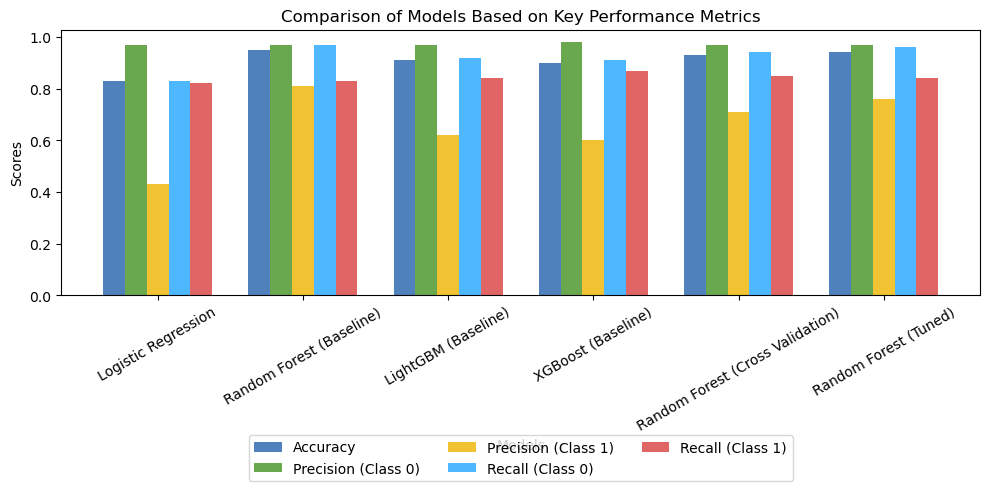

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = ['Logistic Regression', 'Random Forest (Baseline)', 'LightGBM (Baseline)', 'XGBoost (Baseline)', 
          'Random Forest (Cross Validation)', 'Random Forest (Tuned)']
accuracy = [0.83, 0.95, 0.91, 0.90, 0.93, 0.94]
precision_class_0 = [0.97, 0.97, 0.97, 0.98, 0.97, 0.97]
precision_class_1 = [0.43, 0.81, 0.62, 0.60, 0.71, 0.76]
recall_class_0 = [0.83, 0.97, 0.92, 0.91, 0.94, 0.96]
recall_class_1 = [0.82, 0.83, 0.84, 0.87, 0.85, 0.84]
f1_class_0 = [0.89, 0.97, 0.94, 0.94, 0.96, 0.97]
f1_class_1 = [0.57, 0.82, 0.72, 0.71, 0.77, 0.80]

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))

width = 0.15  # width of the bars
x = np.arange(len(models))  # the label locations

# Create bars for each metric with softer colors
ax.bar(x - 2*width, accuracy, width, label='Accuracy', color='#4f81bd')
ax.bar(x - width, precision_class_0, width, label='Precision (Class 0)', color='#6aa84f')
ax.bar(x, precision_class_1, width, label='Precision (Class 1)', color='#f1c232')
ax.bar(x + width, recall_class_0, width, label='Recall (Class 0)', color='#4db8ff')
ax.bar(x + 2*width, recall_class_1, width, label='Recall (Class 1)', color='#e06666')

# Labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models Based on Key Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30)

# Position the legend at the extreme bottom after the labels
ax.legend(bbox_to_anchor=(0.5, -0.5), loc='upper center', ncol=3)

# Display the plot
plt.tight_layout()
plt.show()


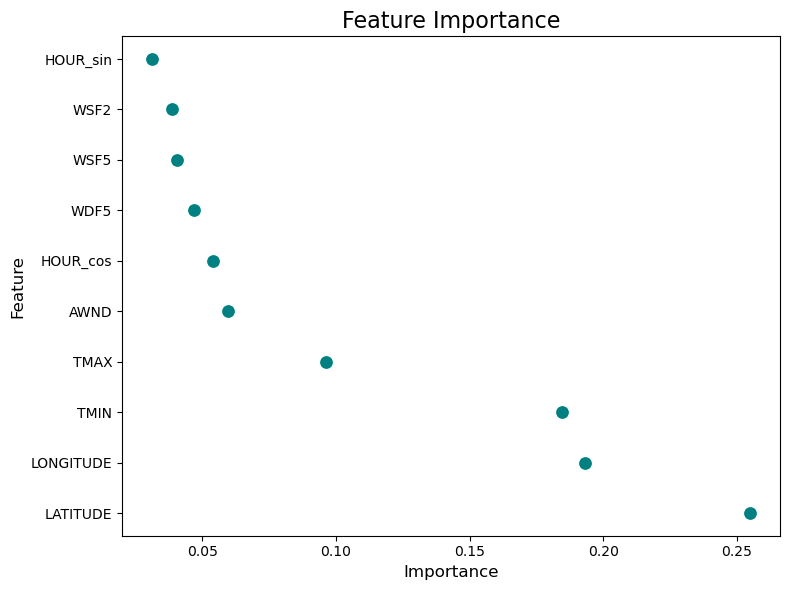

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for feature importance
features = ['LATITUDE', 'LONGITUDE', 'TMIN', 'TMAX', 'AWND', 'HOUR_cos', 'WDF5', 'WSF5', 'WSF2', 'HOUR_sin']
importances = [0.2549, 0.1930, 0.1845, 0.0963, 0.0596, 0.0540, 0.0470, 0.0407, 0.0388, 0.0311]

# Create a DataFrame for better handling
df_feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort values by Importance
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=True)

# Plot using a horizontal dot plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Importance', y='Feature', data=df_feature_importance, s=100, color='teal')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


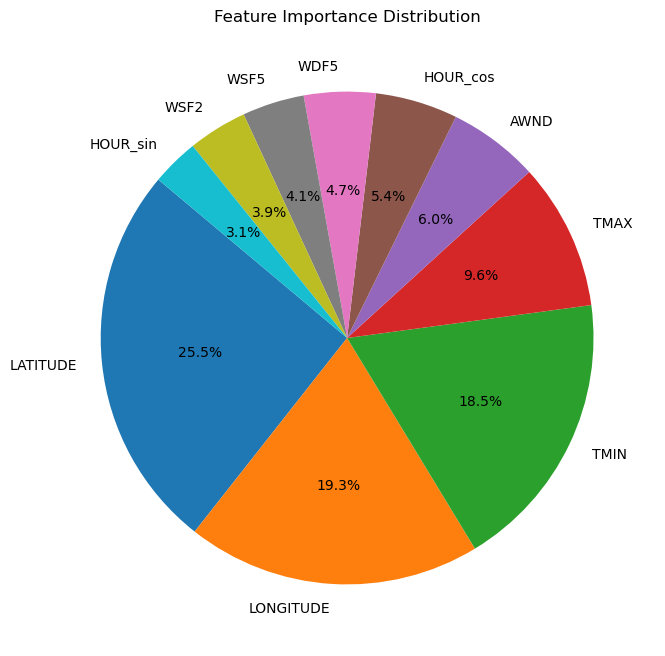

In [123]:
import matplotlib.pyplot as plt

# Feature names and their corresponding importances
features = ['LATITUDE', 'LONGITUDE', 'TMIN', 'TMAX', 'AWND', 'HOUR_cos', 'WDF5', 'WSF5', 'WSF2', 'HOUR_sin']
importances = [0.2549, 0.1930, 0.1845, 0.0963, 0.0596, 0.0540, 0.0470, 0.0407, 0.0388, 0.0311]

# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(importances, labels=features, autopct='%1.1f%%', startangle=140)
plt.title('Feature Importance Distribution')
plt.show()
